In [1]:
import numpy  as np
import pandas as pd
import json
import pandas

In [2]:
import nltk
import nltk.corpus
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.metrics                  import silhouette_samples, silhouette_score
from sklearn.preprocessing            import normalize
from nltk.tokenize                    import word_tokenize
import re
from unidecode                        import unidecode
from nltk.corpus import stopwords

In [3]:
import matplotlib.pyplot  as plt
import matplotlib.cm      as cm
import seaborn            as sns
from sklearn.metrics                  import silhouette_samples, silhouette_score
from wordcloud                        import WordCloud

In [4]:
from sklearn import cluster

In [5]:
Jó_1 = "There was a man in the land of Uz, whose name was Job; and that man was perfect and upright, and one that feared God, and eschewed evil.And there were born to him seven sons and three daughters.His substance also was seven thousand sheep, and three thousand camels, and five hundred yoke of oxen, and five hundred she asses, and a very great household; so that this man was the greatest of all the men of the east.And his sons went and feasted in their houses, every one his day; and sent and called for their three sisters to eat and to drink with them.And it was so, when the days of their feasting were gone about, that Job sent and sanctified them, and rose up early in the morning, and offered burnt offerings according to the number of them all: for Job said, It may be that my sons have sinned, and cursed God in their hearts. Thus did Job continually.Now there was a day when the sons of God came to present themselves before the LORD, and Satan came also among them.And the LORD said to Satan, From where come you? Then Satan answered the LORD, and said, From going to and fro in the earth, and from walking up and down in it.And the LORD said to Satan, Have you considered my servant Job, that there is none like him in the earth, a perfect and an upright man, one that fears God, and eschews evil?Then Satan answered the LORD, and said, Does Job fear God for nothing?Have not you made an hedge about him, and about his house, and about all that he has on every side? you have blessed the work of his hands, and his substance is increased in the land.But put forth your hand now, and touch all that he has, and he will curse you to your face.And the LORD said to Satan, Behold, all that he has is in your power; only on himself put not forth your hand. So Satan went forth from the presence of the LORD.And there was a day when his sons and his daughters were eating and drinking wine in their oldest brother' house:And there came a messenger to Job, and said, The oxen were plowing, and the asses feeding beside them:And the Sabeans fell on them, and took them away; yes, they have slain the servants with the edge of the sword; and I only am escaped alone to tell you.While he was yet speaking, there came also another, and said, The fire of God is fallen from heaven, and has burned up the sheep, and the servants, and consumed them; and I only am escaped alone to tell you.While he was yet speaking, there came also another, and said, The Chaldeans made out three bands, and fell on the camels, and have carried them away, yes, and slain the servants with the edge of the sword; and I only am escaped alone to tell you.While he was yet speaking, there came also another, and said, Your sons and your daughters were eating and drinking wine in their oldest brother' house:And, behold, there came a great wind from the wilderness, and smote the four corners of the house, and it fell on the young men, and they are dead; and I only am escaped alone to tell you.Then Job arose, and rent his mantle, and shaved his head, and fell down on the ground, and worshipped,And said, Naked came I out of my mother' womb, and naked shall I return thither: the LORD gave, and the LORD has taken away; blessed be the name of the LORD.In all this Job sinned not, nor charged God foolishly.".lower()

In [6]:
Jó_2 = "Again there was a day when the sons of God came to present themselves before the LORD, and Satan came also among them to present himself before the LORD.And the LORD said to Satan, From where come you? And Satan answered the LORD, and said, From going to and fro in the earth, and from walking up and down in it.And the LORD said to Satan, Have you considered my servant Job, that there is none like him in the earth, a perfect and an upright man, one that fears God, and eschews evil? and still he holds fast his integrity, although you moved me against him, to destroy him without cause.And Satan answered the LORD, and said, Skin for skin, yes, all that a man has will he give for his life.But put forth your hand now, and touch his bone and his flesh, and he will curse you to your face.And the LORD said to Satan, Behold, he is in your hand; but save his life.So went Satan forth from the presence of the LORD, and smote Job with sore boils from the sole of his foot to his crown.And he took him a potsherd to scrape himself with; and he sat down among the ashes.Then said his wife to him, Do you still retain your integrity? curse God, and die.But he said to her, You speak as one of the foolish women speaks. What? shall we receive good at the hand of God, and shall we not receive evil? In all this did not Job sin with his lips.Now when Job' three friends heard of all this evil that was come on him, they came every one from his own place; Eliphaz the Temanite, and Bildad the Shuhite, and Zophar the Naamathite: for they had made an appointment together to come to mourn with him and to comfort him.And when they lifted up their eyes afar off, and knew him not, they lifted up their voice, and wept; and they rent every one his mantle, and sprinkled dust on their heads toward heaven.So they sat down with him".lower()

In [7]:
Jó_3 = "After this opened Job his mouth, and cursed his day.And Job spoke, and said,Let the day perish wherein I was born, and the night in which it was said, There is a man child conceived.Let that day be darkness; let not God regard it from above, neither let the light shine on it.Let darkness and the shadow of death stain it; let a cloud dwell on it; let the blackness of the day terrify it.As for that night, let darkness seize on it; let it not be joined to the days of the year, let it not come into the number of the months.See, let that night be solitary, let no joyful voice come therein.Let them curse it that curse the day, who are ready to raise up their mourning.Let the stars of the twilight thereof be dark; let it look for light, but have none; neither let it see the dawning of the day:Because it shut not up the doors of my mother' womb, nor hid sorrow from my eyes.Why died I not from the womb? why did I not give up the ghost when I came out of the belly?Why did the knees prevent me? or why the breasts that I should suck?For now should I have lain still and been quiet, I should have slept: then had I been at rest,With kings and counsellors of the earth, which build desolate places for themselves;Or with princes that had gold, who filled their houses with silver:Or as an hidden untimely birth I had not been; as infants which never saw light.There the wicked cease from troubling; and there the weary be at rest.There the prisoners rest together; they hear not the voice of the oppressor.The small and great are there; and the servant is free from his master.Why is light given to him that is in misery, and life to the bitter in soul;Which long for death, but it comes not; and dig for it more than for hid treasures;Which rejoice exceedingly, and are glad, when they can find the grave?Why is light given to a man whose way is hid, and whom God has hedged in?For my sighing comes before I eat, and my roarings are poured out like the waters.For the thing which I greatly feared is come on me, and that which I was afraid of is come to me.I was not in safety, neither had I rest, neither was I quiet; yet trouble came.".lower()

In [8]:
Jó_4 = "Then Eliphaz the Temanite answered and said,If we assay to commune with you, will you be grieved? but who can withhold himself from speaking?Behold, you have instructed many, and you have strengthened the weak hands.Your words have upheld him that was falling, and you have strengthened the feeble knees.But now it is come on you, and you faint; it touches you, and you are troubled.Is not this your fear, your confidence, your hope, and the uprightness of your ways?Remember, I pray you, who ever perished, being innocent? or where were the righteous cut off?Even as I have seen, they that plow iniquity, and sow wickedness, reap the same.By the blast of God they perish, and by the breath of his nostrils are they consumed.The roaring of the lion, and the voice of the fierce lion, and the teeth of the young lions, are broken.The old lion perishes for lack of prey, and the stout lion' whelps are scattered abroad.Now a thing was secretly brought to me, and my ear received a little thereof.In thoughts from the visions of the night, when deep sleep falls on men,Fear came on me, and trembling, which made all my bones to shake.Then a spirit passed before my face; the hair of my flesh stood up:It stood still, but I could not discern the form thereof: an image was before my eyes, there was silence, and I heard a voice, saying,Shall mortal man be more just than God? shall a man be more pure than his maker?Behold, he put no trust in his servants; and his angels he charged with folly:How much less in them that dwell in houses of clay, whose foundation is in the dust, which are crushed before the moth?They are destroyed from morning to evening: they perish for ever without any regarding it.Does not their excellency which is in them go away? they die, even without wisdom.".lower()

In [9]:
Jó_5 = "Call now, if there be any that will answer you; and to which of the saints will you turn?For wrath kills the foolish man, and envy slays the silly one.I have seen the foolish taking root: but suddenly I cursed his habitation.His children are far from safety, and they are crushed in the gate, neither is there any to deliver them.Whose harvest the hungry eats up, and takes it even out of the thorns, and the robber swallows up their substance.Although affliction comes not forth of the dust, neither does trouble spring out of the ground;Yet man is born to trouble, as the sparks fly upward.I would seek to God, and to God would I commit my cause:Which does great things and unsearchable; marvelous things without number:Who gives rain on the earth, and sends waters on the fields:To set up on high those that be low; that those which mourn may be exalted to safety.He disappoints the devices of the crafty, so that their hands cannot perform their enterprise.He takes the wise in their own craftiness: and the counsel of the fraudulent is carried headlong.They meet with darkness in the day time, and grope in the noonday as in the night.But he saves the poor from the sword, from their mouth, and from the hand of the mighty.So the poor has hope, and iniquity stops her mouth.Behold, happy is the man whom God corrects: therefore despise not you the chastening of the Almighty:For he makes sore, and binds up: he wounds, and his hands make whole.He shall deliver you in six troubles: yes, in seven there shall no evil touch you.In famine he shall redeem you from death: and in war from the power of the sword.You shall be hid from the whip of the tongue: neither shall you be afraid of destruction when it comes.At destruction and famine you shall laugh: neither shall you be afraid of the beasts of the earth.For you shall be in league with the stones of the field: and the beasts of the field shall be at peace with you.And you shall know that your tabernacle shall be in peace; and you shall visit your habitation, and shall not sin.You shall know also that your seed shall be great, and your offspring as the grass of the earth.You shall come to your grave in a full age, like as a shock of corn comes in in his season.See this, we have searched it, so it is; hear it, and know you it for your good.".lower()

In [10]:
Jó_6 = "But Job answered and said,Oh that my grief were thoroughly weighed, and my calamity laid in the balances together!For now it would be heavier than the sand of the sea: therefore my words are swallowed up.For the arrows of the Almighty are within me, the poison whereof drinks up my spirit: the terrors of God do set themselves in array against me.Does the wild ass bray when he has grass? or lows the ox over his fodder?Can that which is unsavory be eaten without salt? or is there any taste in the white of an egg?The things that my soul refused to touch are as my sorrowful meat.Oh that I might have my request; and that God would grant me the thing that I long for!Even that it would please God to destroy me; that he would let loose his hand, and cut me off!Then should I yet have comfort; yes, I would harden myself in sorrow: let him not spare; for I have not concealed the words of the Holy One.What is my strength, that I should hope? and what is my end, that I should prolong my life?Is my strength the strength of stones? or is my flesh of brass?Is not my help in me? and is wisdom driven quite from me?To him that is afflicted pity should be showed from his friend; but he forsakes the fear of the Almighty.My brothers have dealt deceitfully as a brook, and as the stream of brooks they pass away;Which are blackish by reason of the ice, and wherein the snow is hid:What time they wax warm, they vanish: when it is hot, they are consumed out of their place.The paths of their way are turned aside; they go to nothing, and perish.The troops of Tema looked, the companies of Sheba waited for them.They were confounded because they had hoped; they came thither, and were ashamed.For now you are nothing; you see my casting down, and are afraid.Did I say, Bring to me? or, Give a reward for me of your substance?Or, Deliver me from the enemy' hand? or, Redeem me from the hand of the mighty?Teach me, and I will hold my tongue: and cause me to understand wherein I have erred.How forcible are right words! but what does your arguing reprove?Do you imagine to reprove words, and the speeches of one that is desperate, which are as wind?Yes, you overwhelm the fatherless, and you dig a pit for your friend.Now therefore be content, look on me; for it is evident to you if I lie.Return, I pray you, let it not be iniquity; yes, return again, my righteousness is in it.Is there iniquity in my tongue? cannot my taste discern perverse things?".lower()

In [11]:
Jó_7 = "Is there not an appointed time to man on earth? are not his days also like the days of an hireling?As a servant earnestly desires the shadow, and as an hireling looks for the reward of his work:So am I made to possess months of vanity, and wearisome nights are appointed to me.When I lie down, I say, When shall I arise, and the night be gone? and I am full of tossings to and fro to the dawning of the day.My flesh is clothed with worms and clods of dust; my skin is broken, and become loathsome.My days are swifter than a weaver' shuttle, and are spent without hope.O remember that my life is wind: my eye shall no more see good.The eye of him that has seen me shall see me no more: your eyes are on me, and I am not.As the cloud is consumed and vanishes away: so he that goes down to the grave shall come up no more.He shall return no more to his house, neither shall his place know him any more.Therefore I will not refrain my mouth; I will speak in the anguish of my spirit; I will complain in the bitterness of my soul.Am I a sea, or a whale, that you set a watch over me?When I say, My bed shall comfort me, my couch shall ease my complaints;Then you scare me with dreams, and terrify me through visions:So that my soul chooses strangling, and death rather than my life.I loathe it; I would not live always: let me alone; for my days are vanity.What is man, that you should magnify him? and that you should set your heart on him?And that you should visit him every morning, and try him every moment?How long will you not depart from me, nor let me alone till I swallow down my spittle?I have sinned; what shall I do to you, O you preserver of men? why have you set me as a mark against you, so that I am a burden to myself?And why do you not pardon my transgression, and take away my iniquity? for now shall I sleep in the dust; and you shall seek me in the morning, but I shall not be.".lower()

In [12]:
Jó_8 = "Then answered Bildad the Shuhite, and said,How long will you speak these things? and how long shall the words of your mouth be like a strong wind?Does God pervert judgment? or does the Almighty pervert justice?If your children have sinned against him, and he have cast them away for their transgression;If you would seek to God betimes, and make your supplication to the Almighty;If you were pure and upright; surely now he would awake for you, and make the habitation of your righteousness prosperous.Though your beginning was small, yet your latter end should greatly increase.For inquire, I pray you, of the former age, and prepare yourself to the search of their fathers:(For we are but of yesterday, and know nothing, because our days on earth are a shadow:)Shall not they teach you, and tell you, and utter words out of their heart?Can the rush grow up without mire? can the flag grow without water?Whilst it is yet in his greenness, and not cut down, it wither before any other herb.So are the paths of all that forget God; and the hypocrite' hope shall perish:Whose hope shall be cut off, and whose trust shall be a spider' web.He shall lean on his house, but it shall not stand: he shall hold it fast, but it shall not endure.He is green before the sun, and his branch shoots forth in his garden.His roots are wrapped about the heap, and sees the place of stones.If he destroy him from his place, then it shall deny him, saying, I have not seen you.Behold, this is the joy of his way, and out of the earth shall others grow.Behold, God will not cast away a perfect man, neither will he help the evil doers:Till he fill your mouth with laughing, and your lips with rejoicing.They that hate you shall be clothed with shame; and the dwelling place of the wicked shall come to nothing.".lower()

In [13]:
Jó_9 = "Then Job answered and said,I know it is so of a truth: but how should man be just with God?If he will contend with him, he cannot answer him one of a thousand.He is wise in heart, and mighty in strength: who has hardened himself against him, and has prospered?Which removes the mountains, and they know not: which overturns them in his anger.Which shakes the earth out of her place, and the pillars thereof tremble.Which commands the sun, and it rises not; and seals up the stars.Which alone spreads out the heavens, and treads on the waves of the sea.Which makes Arcturus, Orion, and Pleiades, and the chambers of the south.Which does great things past finding out; yes, and wonders without number.See, he goes by me, and I see him not: he passes on also, but I perceive him not.Behold, he takes away, who can hinder him? who will say to him, What do you?If God will not withdraw his anger, the proud helpers do stoop under him.How much less shall I answer him, and choose out my words to reason with him?Whom, though I were righteous, yet would I not answer, but I would make supplication to my judge.If I had called, and he had answered me; yet would I not believe that he had listened to my voice.For he breaks me with a tempest, and multiplies my wounds without cause.He will not suffer me to take my breath, but fills me with bitterness.If I speak of strength, see, he is strong: and if of judgment, who shall set me a time to plead?If I justify myself, my own mouth shall condemn me: if I say, I am perfect, it shall also prove me perverse.Though I were perfect, yet would I not know my soul: I would despise my life.This is one thing, therefore I said it, He destroys the perfect and the wicked.If the whip slay suddenly, he will laugh at the trial of the innocent.The earth is given into the hand of the wicked: he covers the faces of the judges thereof; if not, where, and who is he?Now my days are swifter than a post: they flee away, they see no good.They are passed away as the swift ships: as the eagle that hastens to the prey.If I say, I will forget my complaint, I will leave off my heaviness, and comfort myself:I am afraid of all my sorrows, I know that you will not hold me innocent.If I be wicked, why then labor I in vain?If I wash myself with snow water, and make my hands never so clean;Yet shall you plunge me in the ditch, and my own clothes shall abhor me.For he is not a man, as I am, that I should answer him, and we should come together in judgment.Neither is there any judge between us, that might lay his hand on us both.Let him take his rod away from me, and let not his fear terrify me:Then would I speak, and not fear him; but it is not so with me.".lower()

In [14]:
Jó_10 = "My soul is weary of my life; I will leave my complaint on myself; I will speak in the bitterness of my soul.I will say to God, Do not condemn me; show me why you contend with me.Is it good to you that you should oppress, that you should despise the work of your hands, and shine on the counsel of the wicked?Have you eyes of flesh? or see you as man sees?Are your days as the days of man? are your years as man' days,That you enquire after my iniquity, and search after my sin?You know that I am not wicked; and there is none that can deliver out of your hand.Your hands have made me and fashioned me together round about; yet you do destroy me.Remember, I beseech you, that you have made me as the clay; and will you bring me into dust again?Have you not poured me out as milk, and curdled me like cheese?You have clothed me with skin and flesh, and have fenced me with bones and sinews.You have granted me life and favor, and your visitation has preserved my spirit.And these things have you hid in your heart: I know that this is with you.If I sin, then you mark me, and you will not acquit me from my iniquity.If I be wicked, woe to me; and if I be righteous, yet will I not lift up my head. I am full of confusion; therefore see you my affliction;For it increases. You hunt me as a fierce lion: and again you show yourself marvelous on me.You renew your witnesses against me, and increase your indignation on me; changes and war are against me.Why then have you brought me forth out of the womb? Oh that I had given up the ghost, and no eye had seen me!I should have been as though I had not been; I should have been carried from the womb to the grave.Are not my days few? cease then, and let me alone, that I may take comfort a little,Before I go from where I shall not return, even to the land of darkness and the shadow of death;A land of darkness, as darkness itself; and of the shadow of death, without any order, and where the light is as darkness.".lower()

In [15]:
Jó_11 = "Then answered Zophar the Naamathite, and said,Should not the multitude of words be answered? and should a man full of talk be justified?Should your lies make men hold their peace? and when you mock, shall no man make you ashamed?For you have said, My doctrine is pure, and I am clean in your eyes.But oh that God would speak, and open his lips against you;And that he would show you the secrets of wisdom, that they are double to that which is! Know therefore that God exacts of you less than your iniquity deserves.Can you by searching find out God? can you find out the Almighty to perfection?It is as high as heaven; what can you do? deeper than hell; what can you know?The measure thereof is longer than the earth, and broader than the sea.If he cut off, and shut up, or gather together, then who can hinder him?For he knows vain men: he sees wickedness also; will he not then consider it?For vain men would be wise, though man be born like a wild ass' colt.If you prepare your heart, and stretch out your hands toward him;If iniquity be in your hand, put it far away, and let not wickedness dwell in your tabernacles.For then shall you lift up your face without spot; yes, you shall be steadfast, and shall not fear:Because you shall forget your misery, and remember it as waters that pass away:And your age shall be clearer than the noonday: you shall shine forth, you shall be as the morning.And you shall be secure, because there is hope; yes, you shall dig about you, and you shall take your rest in safety.Also you shall lie down, and none shall make you afraid; yes, many shall make suit to you.But the eyes of the wicked shall fail, and they shall not escape, and their hope shall be as the giving up of the ghost.".lower()

In [16]:
Jó_12 = "And Job answered and said,No doubt but you are the people, and wisdom shall die with you.But I have understanding as well as you; I am not inferior to you: yes, who knows not such things as these?I am as one mocked of his neighbor, who calls on God, and he answers him: the just upright man is laughed to scorn.He that is ready to slip with his feet is as a lamp despised in the thought of him that is at ease.The tabernacles of robbers prosper, and they that provoke God are secure; into whose hand God brings abundantly.But ask now the beasts, and they shall teach you; and the fowls of the air, and they shall tell you:Or speak to the earth, and it shall teach you: and the fishes of the sea shall declare to you.Who knows not in all these that the hand of the LORD has worked this?In whose hand is the soul of every living thing, and the breath of all mankind.Does not the ear try words? and the mouth taste his meat?With the ancient is wisdom; and in length of days understanding.With him is wisdom and strength, he has counsel and understanding.Behold, he breaks down, and it cannot be built again: he shuts up a man, and there can be no opening.Behold, he withholds the waters, and they dry up: also he sends them out, and they overturn the earth.With him is strength and wisdom: the deceived and the deceiver are his.He leads counsellors away spoiled, and makes the judges fools.He looses the bond of kings, and girds their loins with a girdle.He leads princes away spoiled, and overthrows the mighty.He removes away the speech of the trusty, and takes away the understanding of the aged.He pours contempt on princes, and weakens the strength of the mighty.He discovers deep things out of darkness, and brings out to light the shadow of death.He increases the nations, and destroys them: he enlarges the nations, and straitens them again.He takes away the heart of the chief of the people of the earth, and causes them to wander in a wilderness where there is no way.They grope in the dark without light, and he makes them to stagger like a drunken man.".lower()

In [17]:
Jó_13 = "See, my eye has seen all this, my ear has heard and understood it.What you know, the same do I know also: I am not inferior to you.Surely I would speak to the Almighty, and I desire to reason with God.But you are forgers of lies, you are all physicians of no value.O that you would altogether hold your peace! and it should be your wisdom.Hear now my reasoning, and listen to the pleadings of my lips.Will you speak wickedly for God? and talk deceitfully for him?Will you accept his person? will you contend for God?Is it good that he should search you out? or as one man mocks another, do you so mock him?He will surely reprove you, if you do secretly accept persons.Shall not his excellency make you afraid? and his dread fall on you?Your remembrances are like to ashes, your bodies to bodies of clay.Hold your peace, let me alone, that I may speak, and let come on me what will.Why do I take my flesh in my teeth, and put my life in my hand?Though he slay me, yet will I trust in him: but I will maintain my own ways before him.He also shall be my salvation: for an hypocrite shall not come before him.Hear diligently my speech, and my declaration with your ears.Behold now, I have ordered my cause; I know that I shall be justified.Who is he that will plead with me? for now, if I hold my tongue, I shall give up the ghost.Only do not two things to me: then will I not hide myself from you.Withdraw your hand far from me: and let not your dread make me afraid.Then call you, and I will answer: or let me speak, and answer you me.How many are my iniquities and sins? make me to know my transgression and my sin.Why hide you your face, and hold me for your enemy?Will you break a leaf driven to and fro? and will you pursue the dry stubble?For you write bitter things against me, and make me to possess the iniquities of my youth.You put my feet also in the stocks, and look narrowly to all my paths; you set a print on the heels of my feet.And he, as a rotten thing, consumes, as a garment that is moth eaten.".lower()

In [18]:
Jó_14 = "Man that is born of a woman is of few days and full of trouble.He comes forth like a flower, and is cut down: he flees also as a shadow, and continues not.And does you open your eyes on such an one, and bring me into judgment with you?Who can bring a clean thing out of an unclean? not one.Seeing his days are determined, the number of his months are with you, you have appointed his bounds that he cannot pass;Turn from him, that he may rest, till he shall accomplish, as an hireling, his day.For there is hope of a tree, if it be cut down, that it will sprout again, and that the tender branch thereof will not cease.Though the root thereof wax old in the earth, and the stock thereof die in the ground;Yet through the scent of water it will bud, and bring forth boughs like a plant.But man dies, and wastes away: yes, man gives up the ghost, and where is he?As the waters fail from the sea, and the flood decays and dries up:So man lies down, and rises not: till the heavens be no more, they shall not awake, nor be raised out of their sleep.O that you would hide me in the grave, that you would keep me secret, until your wrath be past, that you would appoint me a set time, and remember me!If a man die, shall he live again? all the days of my appointed time will I wait, till my change come.You shall call, and I will answer you: you will have a desire to the work of your hands.For now you number my steps: do you not watch over my sin?My transgression is sealed up in a bag, and you sew up my iniquity.And surely the mountains falling comes to nothing, and the rock is removed out of his place.The waters wear the stones: you wash away the things which grow out of the dust of the earth; and you destroy the hope of man.You prevail for ever against him, and he passes: you change his countenance, and send him away.His sons come to honor, and he knows it not; and they are brought low, but he perceives it not of them.But his flesh on him shall have pain, and his soul within him shall mourn.".lower()

In [19]:
Jó_15 = "Then answered Eliphaz the Temanite, and said,Should a wise man utter vain knowledge, and fill his belly with the east wind?Should he reason with unprofitable talk? or with speeches with which he can do no good?Yes, you cast off fear, and restrain prayer before God.For your mouth utters your iniquity, and you choose the tongue of the crafty.Your own mouth comdemns you, and not I: yes, your own lips testify against you.Are you the first man that was born? or were you made before the hills?Have you heard the secret of God? and do you restrain wisdom to yourself?What know you, that we know not? what understand you, which is not in us?With us are both the gray headed and very aged men, much elder than your father.Are the consolations of God small with you? is there any secret thing with you?Why does your heart carry you away? and what do your eyes wink at,That you turn your spirit against God, and let such words go out of your mouth?What is man, that he should be clean? and he which is born of a woman, that he should be righteous?Behold, he puts no trust in his saints; yes, the heavens are not clean in his sight.How much more abominable and filthy is man, which drinks iniquity like water?I will show you, hear me; and that which I have seen I will declare;Which wise men have told from their fathers, and have not hid it:To whom alone the earth was given, and no stranger passed among them.The wicked man travails with pain all his days, and the number of years is hidden to the oppressor.A dreadful sound is in his ears: in prosperity the destroyer shall come on him.He believes not that he shall return out of darkness, and he is waited for of the sword.He wanders abroad for bread, saying, Where is it? he knows that the day of darkness is ready at his hand.Trouble and anguish shall make him afraid; they shall prevail against him, as a king ready to the battle.For he stretches out his hand against God, and strengthens himself against the Almighty.He runs on him, even on his neck, on the thick bosses of his bucklers:Because he covers his face with his fatness, and makes bulges of fat on his flanks.And he dwells in desolate cities, and in houses which no man inhabits, which are ready to become heaps.He shall not be rich, neither shall his substance continue, neither shall he prolong the perfection thereof on the earth.He shall not depart out of darkness; the flame shall dry up his branches, and by the breath of his mouth shall he go away.Let not him that is deceived trust in vanity: for vanity shall be his recompense.It shall be accomplished before his time, and his branch shall not be green.He shall shake off his unripe grape as the vine, and shall cast off his flower as the olive.For the congregation of hypocrites shall be desolate, and fire shall consume the tabernacles of bribery.They conceive mischief, and bring forth vanity, and their belly prepares deceit.".lower()

In [20]:
Jó_16 = "Then Job answered and said,I have heard many such things: miserable comforters are you all.Shall vain words have an end? or what emboldens you that you answer?I also could speak as you do: if your soul were in my soul' stead, I could heap up words against you, and shake my head at you.But I would strengthen you with my mouth, and the moving of my lips should assuage your grief.Though I speak, my grief is not assuaged: and though I forbear, what am I eased?But now he has made me weary: you have made desolate all my company.And you have filled me with wrinkles, which is a witness against me: and my leanness rising up in me bears witness to my face.He tears me in his wrath, who hates me: he gnashes on me with his teeth; my enemy sharpens his eyes on me.They have gaped on me with their mouth; they have smitten me on the cheek reproachfully; they have gathered themselves together against me.God has delivered me to the ungodly, and turned me over into the hands of the wicked.I was at ease, but he has broken me asunder: he has also taken me by my neck, and shaken me to pieces, and set me up for his mark.His archers compass me round about, he splits my reins asunder, and does not spare; he pours out my gall on the ground.He breaks me with breach on breach, he runs on me like a giant.I have sewed sackcloth on my skin, and defiled my horn in the dust.My face is foul with weeping, and on my eyelids is the shadow of death;Not for any injustice in my hands: also my prayer is pure.O earth, cover not you my blood, and let my cry have no place.Also now, behold, my witness is in heaven, and my record is on high.My friends scorn me: but my eye pours out tears to God.O that one might plead for a man with God, as a man pleads for his neighbor!When a few years are come, then I shall go the way from where I shall not return.".lower()

In [21]:
Jó_17 = "My breath is corrupt, my days are extinct, the graves are ready for me.Are there not mockers with me? and does not my eye continue in their provocation?Lay down now, put me in a surety with you; who is he that will strike hands with me?For you have hid their heart from understanding: therefore shall you not exalt them.He that speaks flattery to his friends, even the eyes of his children shall fail.He has made me also a byword of the people; and aforetime I was as a tabret.My eye also is dim by reason of sorrow, and all my members are as a shadow.Upright men shall be astonished at this, and the innocent shall stir up himself against the hypocrite.The righteous also shall hold on his way, and he that has clean hands shall be stronger and stronger.But as for you all, do you return, and come now: for I cannot find one wise man among you.My days are past, my purposes are broken off, even the thoughts of my heart.They change the night into day: the light is short because of darkness.If I wait, the grave is my house: I have made my bed in the darkness.I have said to corruption, You are my father: to the worm, You are my mother, and my sister.And where is now my hope? as for my hope, who shall see it?They shall go down to the bars of the pit, when our rest together is in the dust.".lower()

In [22]:
Jó_18 = "Then answered Bildad the Shuhite, and said,How long will it be ere you make an end of words? mark, and afterwards we will speak.Why are we counted as beasts, and reputed vile in your sight?He tears himself in his anger: shall the earth be forsaken for you? and shall the rock be removed out of his place?Yes, the light of the wicked shall be put out, and the spark of his fire shall not shine.The light shall be dark in his tabernacle, and his candle shall be put out with him.The steps of his strength shall be straitened, and his own counsel shall cast him down.For he is cast into a net by his own feet, and he walks on a snare.The gin shall take him by the heel, and the robber shall prevail against him.The snare is laid for him in the ground, and a trap for him in the way.Terrors shall make him afraid on every side, and shall drive him to his feet.His strength shall be extremely hungry, and destruction shall be ready at his side.It shall devour the strength of his skin: even the firstborn of death shall devour his strength.His confidence shall be rooted out of his tabernacle, and it shall bring him to the king of terrors.It shall dwell in his tabernacle, because it is none of his: brimstone shall be scattered on his habitation.His roots shall be dried up beneath, and above shall his branch be cut off.His remembrance shall perish from the earth, and he shall have no name in the street.He shall be driven from light into darkness, and chased out of the world.He shall neither have son nor nephew among his people, nor any remaining in his dwellings.They that come after him shall be astonished at his day, as they that went before were affrighted.Surely such are the dwellings of the wicked, and this is the place of him that knows not God.".lower()

In [23]:
Jó_19 = "Then Job answered and said,How long will you vex my soul, and break me in pieces with words?These ten times have you reproached me: you are not ashamed that you make yourselves strange to me.And be it indeed that I have erred, my error remains with myself.If indeed you will magnify yourselves against me, and plead against me my reproach:Know now that God has overthrown me, and has compassed me with his net.Behold, I cry out of wrong, but I am not heard: I cry aloud, but there is no judgment.He has fenced up my way that I cannot pass, and he has set darkness in my paths.He has stripped me of my glory, and taken the crown from my head.He has destroyed me on every side, and I am gone: and my hope has he removed like a tree.He has also kindled his wrath against me, and he counts me to him as one of his enemies.His troops come together, and raise up their way against me, and encamp round about my tabernacle.He has put my brothers far from me, and my acquaintance are truly estranged from me.My kinsfolk have failed, and my familiar friends have forgotten me.They that dwell in my house, and my maids, count me for a stranger: I am an alien in their sight.I called my servant, and he gave me no answer; I entreated him with my mouth.My breath is strange to my wife, though I entreated for the children' sake of my own body.Yes, young children despised me; I arose, and they spoke against me.All my inward friends abhorred me: and they whom I loved are turned against me.My bone sticks to my skin and to my flesh, and I am escaped with the skin of my teeth.Have pity on me, have pity on me, O you my friends; for the hand of God has touched me.Why do you persecute me as God, and are not satisfied with my flesh?Oh that my words were now written! oh that they were printed in a book!That they were graven with an iron pen and lead in the rock for ever!For I know that my redeemer lives, and that he shall stand at the latter day on the earth:And though after my skin worms destroy this body, yet in my flesh shall I see God:Whom I shall see for myself, and my eyes shall behold, and not another; though my reins be consumed within me.But you should say, Why persecute we him, seeing the root of the matter is found in me?Be you afraid of the sword: for wrath brings the punishments of the sword, that you may know there is a judgment.".lower()

In [24]:
Jó_20 = "Then answered Zophar the Naamathite, and said,Therefore do my thoughts cause me to answer, and for this I make haste.I have heard the check of my reproach, and the spirit of my understanding causes me to answer.Know you not this of old, since man was placed on earth,That the triumphing of the wicked is short, and the joy of the hypocrite but for a moment?Though his excellency mount up to the heavens, and his head reach to the clouds;Yet he shall perish for ever like his own dung: they which have seen him shall say, Where is he?He shall fly away as a dream, and shall not be found: yes, he shall be chased away as a vision of the night.The eye also which saw him shall see him no more; neither shall his place any more behold him.His children shall seek to please the poor, and his hands shall restore their goods.His bones are full of the sin of his youth, which shall lie down with him in the dust.Though wickedness be sweet in his mouth, though he hide it under his tongue;Though he spare it, and forsake it not; but keep it still within his mouth:Yet his meat in his bowels is turned, it is the gall of asps within him.He has swallowed down riches, and he shall vomit them up again: God shall cast them out of his belly.He shall suck the poison of asps: the viper' tongue shall slay him.He shall not see the rivers, the floods, the brooks of honey and butter.That which he labored for shall he restore, and shall not swallow it down: according to his substance shall the restitution be, and he shall not rejoice therein.Because he has oppressed and has forsaken the poor; because he has violently taken away an house which he built not;Surely he shall not feel quietness in his belly, he shall not save of that which he desired.There shall none of his meat be left; therefore shall no man look for his goods.In the fullness of his sufficiency he shall be in straits: every hand of the wicked shall come on him.When he is about to fill his belly, God shall cast the fury of his wrath on him, and shall rain it on him while he is eating.He shall flee from the iron weapon, and the bow of steel shall strike him through.It is drawn, and comes out of the body; yes, the glittering sword comes out of his gall: terrors are on him.All darkness shall be hid in his secret places: a fire not blown shall consume him; it shall go ill with him that is left in his tabernacle.The heaven shall reveal his iniquity; and the earth shall rise up against him.The increase of his house shall depart, and his goods shall flow away in the day of his wrath.This is the portion of a wicked man from God, and the heritage appointed to him by God.".lower()

In [25]:
Jó_21 = "But Job answered and said,Hear diligently my speech, and let this be your consolations.Suffer me that I may speak; and after that I have spoken, mock on.As for me, is my complaint to man? and if it were so, why should not my spirit be troubled?Mark me, and be astonished, and lay your hand on your mouth.Even when I remember I am afraid, and trembling takes hold on my flesh.Why do the wicked live, become old, yes, are mighty in power?Their seed is established in their sight with them, and their offspring before their eyes.Their houses are safe from fear, neither is the rod of God on them.Their bull engenders, and fails not; their cow calves, and casts not her calf.They send forth their little ones like a flock, and their children dance.They take the tambourine and harp, and rejoice at the sound of the organ.They spend their days in wealth, and in a moment go down to the grave.Therefore they say to God, Depart from us; for we desire not the knowledge of your ways.What is the Almighty, that we should serve him? and what profit should we have, if we pray to him?See, their good is not in their hand: the counsel of the wicked is far from me.How oft is the candle of the wicked put out! and how oft comes their destruction on them! God distributes sorrows in his anger.They are as stubble before the wind, and as chaff that the storm carries away.God lays up his iniquity for his children: he rewards him, and he shall know it.His eyes shall see his destruction, and he shall drink of the wrath of the Almighty.For what pleasure has he in his house after him, when the number of his months is cut off in the middle?Shall any teach God knowledge? seeing he judges those that are high.One dies in his full strength, being wholly at ease and quiet.His breasts are full of milk, and his bones are moistened with marrow.And another dies in the bitterness of his soul, and never eats with pleasure.They shall lie down alike in the dust, and the worms shall cover them.Behold, I know your thoughts, and the devices which you wrongfully imagine against me.For you say, Where is the house of the prince? and where are the dwelling places of the wicked?Have you not asked them that go by the way? and do you not know their tokens,That the wicked is reserved to the day of destruction? they shall be brought forth to the day of wrath.Who shall declare his way to his face? and who shall repay him what he has done?Yet shall he be brought to the grave, and shall remain in the tomb.The clods of the valley shall be sweet to him, and every man shall draw after him, as there are innumerable before him.How then comfort you me in vain, seeing in your answers there remains falsehood?".lower()

In [26]:
Jó_22 = "Then Eliphaz the Temanite answered and said,Can a man be profitable to God, as he that is wise may be profitable to himself?Is it any pleasure to the Almighty, that you are righteous? or is it gain to him, that you make your ways perfect?Will he reprove you for fear of you? will he enter with you into judgment?Is not your wickedness great? and your iniquities infinite?For you have taken a pledge from your brother for nothing, and stripped the naked of their clothing.You have not given water to the weary to drink, and you have withheld bread from the hungry.But as for the mighty man, he had the earth; and the honorable man dwelled in it.You have sent widows away empty, and the arms of the fatherless have been broken.Therefore snares are round about you, and sudden fear troubles you;Or darkness, that you can not see; and abundance of waters cover you.Is not God in the height of heaven? and behold the height of the stars, how high they are!And you say, How does God know? can he judge through the dark cloud?Thick clouds are a covering to him, that he sees not; and he walks in the circuit of heaven.Have you marked the old way which wicked men have trodden?Which were cut down out of time, whose foundation was overflowed with a flood:Which said to God, Depart from us: and what can the Almighty do for them?Yet he filled their houses with good things: but the counsel of the wicked is far from me.The righteous see it, and are glad: and the innocent laugh them to scorn.Whereas our substance is not cut down, but the remnant of them the fire consumes.Acquaint now yourself with him, and be at peace: thereby good shall come to you.Receive, I pray you, the law from his mouth, and lay up his words in your heart.If you return to the Almighty, you shall be built up, you shall put away iniquity far from your tabernacles.Then shall you lay up gold as dust, and the gold of Ophir as the stones of the brooks.Yes, the Almighty shall be your defense, and you shall have plenty of silver.For then shall you have your delight in the Almighty, and shall lift up your face to God.You shall make your prayer to him, and he shall hear you, and you shall pay your vows.You shall also decree a thing, and it shall be established to you: and the light shall shine on your ways.When men are cast down, then you shall say, There is lifting up; and he shall save the humble person.He shall deliver the island of the innocent: and it is delivered by the pureness of your hands.".lower()

In [27]:
Jó_23 = "Then Job answered and said,Even to day is my complaint bitter: my stroke is heavier than my groaning.Oh that I knew where I might find him! that I might come even to his seat!I would order my cause before him, and fill my mouth with arguments.I would know the words which he would answer me, and understand what he would say to me.Will he plead against me with his great power? No; but he would put strength in me.There the righteous might dispute with him; so should I be delivered for ever from my judge.Behold, I go forward, but he is not there; and backward, but I cannot perceive him:On the left hand, where he does work, but I cannot behold him: he hides himself on the right hand, that I cannot see him:But he knows the way that I take: when he has tried me, I shall come forth as gold.My foot has held his steps, his way have I kept, and not declined.Neither have I gone back from the commandment of his lips; I have esteemed the words of his mouth more than my necessary food.But he is in one mind, and who can turn him? and what his soul desires, even that he does.For he performes the thing that is appointed for me: and many such things are with him.Therefore am I troubled at his presence: when I consider, I am afraid of him.For God makes my heart soft, and the Almighty troubles me:Because I was not cut off before the darkness, neither has he covered the darkness from my face.".lower()

In [28]:
Jó_24 = "Why, seeing times are not hidden from the Almighty, do they that know him not see his days?Some remove the landmarks; they violently take away flocks, and feed thereof.They drive away the ass of the fatherless, they take the widow' ox for a pledge.They turn the needy out of the way: the poor of the earth hide themselves together.Behold, as wild asses in the desert, go they forth to their work; rising betimes for a prey: the wilderness yields food for them and for their children.They reap every one his corn in the field: and they gather the vintage of the wicked.They cause the naked to lodge without clothing, that they have no covering in the cold.They are wet with the showers of the mountains, and embrace the rock for want of a shelter.They pluck the fatherless from the breast, and take a pledge of the poor.They cause him to go naked without clothing, and they take away the sheaf from the hungry;Which make oil within their walls, and tread their winepresses, and suffer thirst.Men groan from out of the city, and the soul of the wounded cries out: yet God lays not folly to them.They are of those that rebel against the light; they know not the ways thereof, nor abide in the paths thereof.The murderer rising with the light kills the poor and needy, and in the night is as a thief.The eye also of the adulterer waits for the twilight, saying, No eye shall see me: and disguises his face.In the dark they dig through houses, which they had marked for themselves in the daytime: they know not the light.For the morning is to them even as the shadow of death: if one know them, they are in the terrors of the shadow of death.He is swift as the waters; their portion is cursed in the earth: he beholds not the way of the vineyards.Drought and heat consume the snow waters: so does the grave those which have sinned.The womb shall forget him; the worm shall feed sweetly on him; he shall be no more remembered; and wickedness shall be broken as a tree.He evil entreats the barren that bears not: and does not good to the widow.He draws also the mighty with his power: he rises up, and no man is sure of life.Though it be given him to be in safety, where on he rests; yet his eyes are on their ways.They are exalted for a little while, but are gone and brought low; they are taken out of the way as all other, and cut off as the tops of the ears of corn.And if it be not so now, who will make me a liar, and make my speech nothing worth?".lower()

In [29]:
Jó_25 = "Then answered Bildad the Shuhite, and said,Dominion and fear are with him, he makes peace in his high places.Is there any number of his armies? and on whom does not his light arise?How then can man be justified with God? or how can he be clean that is born of a woman?Behold even to the moon, and it shines not; yes, the stars are not pure in his sight.How much less man, that is a worm? and the son of man, which is a worm?".lower()

In [30]:
Jó_26 = "But Job answered and said,How have you helped him that is without power? how save you the arm that has no strength?How have you counceled him that has no wisdom? and how have you plentifully declared the thing as it is?To whom have you uttered words? and whose spirit came from you?Dead things are formed from under the waters, and the inhabitants thereof.Hell is naked before him, and destruction has no covering.He stretches out the north over the empty place, and hangs the earth on nothing.He binds up the waters in his thick clouds; and the cloud is not rent under them.He holds back the face of his throne, and spreads his cloud on it.He has compassed the waters with bounds, until the day and night come to an end.The pillars of heaven tremble and are astonished at his reproof.He divides the sea with his power, and by his understanding he smites through the proud.By his spirit he has garnished the heavens; his hand has formed the crooked serpent.See, these are parts of his ways: but how little a portion is heard of him? but the thunder of his power who can understand?".lower()

In [31]:
Jó_27 = "Moreover Job continued his parable, and said,As God lives, who has taken away my judgment; and the Almighty, who has vexed my soul;All the while my breath is in me, and the spirit of God is in my nostrils;My lips shall not speak wickedness, nor my tongue utter deceit.God forbid that I should justify you: till I die I will not remove my integrity from me.My righteousness I hold fast, and will not let it go: my heart shall not reproach me so long as I live.Let my enemy be as the wicked, and he that rises up against me as the unrighteous.For what is the hope of the hypocrite, though he has gained, when God takes away his soul?Will God hear his cry when trouble comes on him?Will he delight himself in the Almighty? will he always call on God?I will teach you by the hand of God: that which is with the Almighty will I not conceal.Behold, all you yourselves have seen it; why then are you thus altogether vain?This is the portion of a wicked man with God, and the heritage of oppressors, which they shall receive of the Almighty.If his children be multiplied, it is for the sword: and his offspring shall not be satisfied with bread.Those that remain of him shall be buried in death: and his widows shall not weep.Though he heap up silver as the dust, and prepare raiment as the clay;He may prepare it, but the just shall put it on, and the innocent shall divide the silver.He builds his house as a moth, and as a booth that the keeper makes.The rich man shall lie down, but he shall not be gathered: he opens his eyes, and he is not.Terrors take hold on him as waters, a tempest steals him away in the night.The east wind carries him away, and he departs: and as a storm hurles him out of his place.For God shall cast on him, and not spare: he would fain flee out of his hand.Men shall clap their hands at him, and shall hiss him out of his place.".lower()

In [32]:
Jó_28 = "Surely there is a vein for the silver, and a place for gold where they fine it.Iron is taken out of the earth, and brass is molten out of the stone.He sets an end to darkness, and searches out all perfection: the stones of darkness, and the shadow of death.The flood breaks out from the inhabitant; even the waters forgotten of the foot: they are dried up, they are gone away from men.As for the earth, out of it comes bread: and under it is turned up as it were fire.The stones of it are the place of sapphires: and it has dust of gold.There is a path which no fowl knows, and which the vulture' eye has not seen:The lion' whelps have not trodden it, nor the fierce lion passed by it.He puts forth his hand on the rock; he overturns the mountains by the roots.He cuts out rivers among the rocks; and his eye sees every precious thing.He binds the floods from overflowing; and the thing that is hid brings he forth to light.But where shall wisdom be found? and where is the place of understanding?Man knows not the price thereof; neither is it found in the land of the living.The depth said, It is not in me: and the sea said, It is not with me.It cannot be gotten for gold, neither shall silver be weighed for the price thereof.It cannot be valued with the gold of Ophir, with the precious onyx, or the sapphire.The gold and the crystal cannot equal it: and the exchange of it shall not be for jewels of fine gold.No mention shall be made of coral, or of pearls: for the price of wisdom is above rubies.The topaz of Ethiopia shall not equal it, neither shall it be valued with pure gold.From where then comes wisdom? and where is the place of understanding?Seeing it is hid from the eyes of all living, and kept close from the fowls of the air.Destruction and death say, We have heard the fame thereof with our ears.God understands the way thereof, and he knows the place thereof.For he looks to the ends of the earth, and sees under the whole heaven;To make the weight for the winds; and he weighs the waters by measure.When he made a decree for the rain, and a way for the lightning of the thunder:Then did he see it, and declare it; he prepared it, yes, and searched it out.And to man he said, Behold, the fear of the LORD, that is wisdom; and to depart from evil is understanding.".lower()

In [33]:
Jó_29 = "Moreover Job continued his parable, and said,Oh that I were as in months past, as in the days when God preserved me;When his candle shined on my head, and when by his light I walked through darkness;As I was in the days of my youth, when the secret of God was on my tabernacle;When the Almighty was yet with me, when my children were about me;When I washed my steps with butter, and the rock poured me out rivers of oil;When I went out to the gate through the city, when I prepared my seat in the street!The young men saw me, and hid themselves: and the aged arose, and stood up.The princes refrained talking, and laid their hand on their mouth.The nobles held their peace, and their tongue stuck to the roof of their mouth.When the ear heard me, then it blessed me; and when the eye saw me, it gave witness to me:Because I delivered the poor that cried, and the fatherless, and him that had none to help him.The blessing of him that was ready to perish came on me: and I caused the widow' heart to sing for joy.I put on righteousness, and it clothed me: my judgment was as a robe and a diadem.I was eyes to the blind, and feet was I to the lame.I was a father to the poor: and the cause which I knew not I searched out.And I broke the jaws of the wicked, and plucked the spoil out of his teeth.Then I said, I shall die in my nest, and I shall multiply my days as the sand.My root was spread out by the waters, and the dew lay all night on my branch.My glory was fresh in me, and my bow was renewed in my hand.To me men gave ear, and waited, and kept silence at my counsel.After my words they spoke not again; and my speech dropped on them.And they waited for me as for the rain; and they opened their mouth wide as for the latter rain.If I laughed on them, they believed it not; and the light of my countenance they cast not down.I chose out their way, and sat chief, and dwelled as a king in the army, as one that comforts the mourners.".lower()

In [34]:
Jó_30 = "But now they that are younger than I have me in derision, whose fathers I would have disdained to have set with the dogs of my flock.Yes, whereto might the strength of their hands profit me, in whom old age was perished?For want and famine they were solitary; fleeing into the wilderness in former time desolate and waste.Who cut up mallows by the bushes, and juniper roots for their meat.They were driven forth from among men, (they cried after them as after a thief;)To dwell in the cliffs of the valleys, in caves of the earth, and in the rocks.Among the bushes they brayed; under the nettles they were gathered together.They were children of fools, yes, children of base men: they were viler than the earth.And now am I their song, yes, I am their byword.They abhor me, they flee far from me, and spare not to spit in my face.Because he has loosed my cord, and afflicted me, they have also let loose the bridle before me.On my right hand rise the youth; they push away my feet, and they raise up against me the ways of their destruction.They mar my path, they set forward my calamity, they have no helper.They came on me as a wide breaking in of waters: in the desolation they rolled themselves on me.Terrors are turned on me: they pursue my soul as the wind: and my welfare passes away as a cloud.And now my soul is poured out on me; the days of affliction have taken hold on me.My bones are pierced in me in the night season: and my sinews take no rest.By the great force of my disease is my garment changed: it binds me about as the collar of my coat.He has cast me into the mire, and I am become like dust and ashes.I cry to you, and you do not hear me: I stand up, and you regard me not.You are become cruel to me: with your strong hand you oppose yourself against me.You lift me up to the wind; you cause me to ride on it, and dissolve my substance.For I know that you will bring me to death, and to the house appointed for all living.However, he will not stretch out his hand to the grave, though they cry in his destruction.Did not I weep for him that was in trouble? was not my soul grieved for the poor?When I looked for good, then evil came to me: and when I waited for light, there came darkness.My bowels boiled, and rested not: the days of affliction prevented me.I went mourning without the sun: I stood up, and I cried in the congregation.I am a brother to dragons, and a companion to owls.My skin is black on me, and my bones are burned with heat.My harp also is turned to mourning, and my organ into the voice of them that weep.".lower()

In [35]:
Jó_31 = "I made a covenant with my eyes; why then should I think on a maid?For what portion of God is there from above? and what inheritance of the Almighty from on high?Is not destruction to the wicked? and a strange punishment to the workers of iniquity?Does not he see my ways, and count all my steps?If I have walked with vanity, or if my foot has hurried to deceit;Let me be weighed in an even balance that God may know my integrity.If my step has turned out of the way, and my heart walked after my eyes, and if any blot has stuck to my hands;Then let me sow, and let another eat; yes, let my offspring be rooted out.If my heart have been deceived by a woman, or if I have laid wait at my neighbor' door;Then let my wife grind to another, and let others bow down on her.For this is an heinous crime; yes, it is an iniquity to be punished by the judges.For it is a fire that consumes to destruction, and would root out all my increase.If I did despise the cause of my manservant or of my maidservant, when they contended with me;What then shall I do when God rises up? and when he visits, what shall I answer him?Did not he that made me in the womb make him? and did not one fashion us in the womb?If I have withheld the poor from their desire, or have caused the eyes of the widow to fail;Or have eaten my morsel myself alone, and the fatherless has not eaten thereof;(For from my youth he was brought up with me, as with a father, and I have guided her from my mother' womb;)If I have seen any perish for want of clothing, or any poor without covering;If his loins have not blessed me, and if he were not warmed with the fleece of my sheep;If I have lifted up my hand against the fatherless, when I saw my help in the gate:Then let my arm fall from my shoulder blade, and my arm be broken from the bone.For destruction from God was a terror to me, and by reason of his highness I could not endure.If I have made gold my hope, or have said to the fine gold, You are my confidence;If I rejoice because my wealth was great, and because my hand had gotten much;If I beheld the sun when it shined, or the moon walking in brightness;And my heart has been secretly enticed, or my mouth has kissed my hand:This also were an iniquity to be punished by the judge: for I should have denied the God that is above.If I rejoice at the destruction of him that hated me, or lifted up myself when evil found him:Neither have I suffered my mouth to sin by wishing a curse to his soul.If the men of my tabernacle said not, Oh that we had of his flesh! we cannot be satisfied.The stranger did not lodge in the street: but I opened my doors to the travelers.If I covered my transgressions as Adam, by hiding my iniquity in my bosom:Did I fear a great multitude, or did the contempt of families terrify me, that I kept silence, and went not out of the door?Oh that one would hear me! behold, my desire is, that the Almighty would answer me, and that my adversary had written a book.Surely I would take it on my shoulder, and bind it as a crown to me.I would declare to him the number of my steps; as a prince would I go near to him.If my land cry against me, or that the furrows likewise thereof complain;If I have eaten the fruits thereof without money, or have caused the owners thereof to lose their life:Let thistles grow instead of wheat, and cockle instead of barley. The words of Job are ended.".lower()

In [36]:
Jó_32 = "So these three men ceased to answer Job, because he was righteous in his own eyes.Then was kindled the wrath of Elihu the son of Barachel the Buzite, of the kindred of Ram: against Job was his wrath kindled, because he justified himself rather than God.Also against his three friends was his wrath kindled, because they had found no answer, and yet had condemned Job.Now Elihu had waited till Job had spoken, because they were elder than he.When Elihu saw that there was no answer in the mouth of these three men, then his wrath was kindled.And Elihu the son of Barachel the Buzite answered and said, I am young, and you are very old; why I was afraid, and dared not show you my opinion.I said, Days should speak, and multitude of years should teach wisdom.But there is a spirit in man: and the inspiration of the Almighty gives them understanding.Great men are not always wise: neither do the aged understand judgment.Therefore I said, Listen to me; I also will show my opinion.Behold, I waited for your words; I gave ear to your reasons, whilst you searched out what to say.Yes, I attended to you, and, behold, there was none of you that convinced Job, or that answered his words:Lest you should say, We have found out wisdom: God thrusts him down, not man.Now he has not directed his words against me: neither will I answer him with your speeches.They were amazed, they answered no more: they left off speaking.When I had waited, (for they spoke not, but stood still, and answered no more;)I said, I will answer also my part, I also will show my opinion.For I am full of matter, the spirit within me constrains me.Behold, my belly is as wine which has no vent; it is ready to burst like new bottles.I will speak, that I may be refreshed: I will open my lips and answer.Let me not, I pray you, accept any man' person, neither let me give flattering titles to man.For I know not to give flattering titles; in so doing my maker would soon take me away.".lower()

In [37]:
Jó_33 = "Why, Job, I pray you, hear my speeches, and listen to all my words.Behold, now I have opened my mouth, my tongue has spoken in my mouth.My words shall be of the uprightness of my heart: and my lips shall utter knowledge clearly.The spirit of God has made me, and the breath of the Almighty has given me life.If you can answer me, set your words in order before me, stand up.Behold, I am according to your wish in God' stead: I also am formed out of the clay.Behold, my terror shall not make you afraid, neither shall my hand be heavy on you.Surely you have spoken in my hearing, and I have heard the voice of your words, saying,I am clean without transgression, I am innocent; neither is there iniquity in me.Behold, he finds occasions against me, he counts me for his enemy,He puts my feet in the stocks, he marks all my paths.Behold, in this you are not just: I will answer you, that God is greater than man.Why do you strive against him? for he gives not account of any of his matters.For God speaks once, yes twice, yet man perceives it not.In a dream, in a vision of the night, when deep sleep falls on men, in slumberings on the bed;Then he opens the ears of men, and seals their instruction,That he may withdraw man from his purpose, and hide pride from man.He keeps back his soul from the pit, and his life from perishing by the sword.He is chastened also with pain on his bed, and the multitude of his bones with strong pain:So that his life abhors bread, and his soul dainty meat.His flesh is consumed away, that it cannot be seen; and his bones that were not seen stick out.Yes, his soul draws near to the grave, and his life to the destroyers.If there be a messenger with him, an interpreter, one among a thousand, to show to man his uprightness:Then he is gracious to him, and said, Deliver him from going down to the pit: I have found a ransom.His flesh shall be fresher than a child': he shall return to the days of his youth:He shall pray to God, and he will be favorable to him: and he shall see his face with joy: for he will render to man his righteousness.He looks on men, and if any say, I have sinned, and perverted that which was right, and it profited me not;He will deliver his soul from going into the pit, and his life shall see the light.See, all these things works God oftentimes with man,To bring back his soul from the pit, to be enlightened with the light of the living.Mark well, O Job, listen to me: hold your peace, and I will speak.If you have anything to say, answer me: speak, for I desire to justify you.If not, listen to me: hold your peace, and I shall teach you wisdom.".lower()

In [38]:
Jó_34 = "Furthermore Elihu answered and said,Hear my words, O you wise men; and give ear to me, you that have knowledge.For the ear tries words, as the mouth tastes meat.Let us choose to us judgment: let us know among ourselves what is good.For Job has said, I am righteous: and God has taken away my judgment.Should I lie against my right? my wound is incurable without transgression.What man is like Job, who drinks up scorning like water?Which goes in company with the workers of iniquity, and walks with wicked men.For he has said, It profits a man nothing that he should delight himself with God.Therefore listen to me you men of understanding: far be it from God, that he should do wickedness; and from the Almighty, that he should commit iniquity.For the work of a man shall he render to him, and cause every man to find according to his ways.Yes, surely God will not do wickedly, neither will the Almighty pervert judgment.Who has given him a charge over the earth? or who has disposed the whole world?If he set his heart on man, if he gather to himself his spirit and his breath;All flesh shall perish together, and man shall turn again to dust.If now you have understanding, hear this: listen to the voice of my words.Shall even he that hates right govern? and will you condemn him that is most just?Is it fit to say to a king, You are wicked? and to princes, You are ungodly?How much less to him that accepts not the persons of princes, nor regards the rich more than the poor? for they all are the work of his hands.In a moment shall they die, and the people shall be troubled at midnight, and pass away: and the mighty shall be taken away without hand.For his eyes are on the ways of man, and he sees all his goings.There is no darkness, nor shadow of death, where the workers of iniquity may hide themselves.For he will not lay on man more than right; that he should enter into judgment with God.He shall break in pieces mighty men without number, and set others in their stead.Therefore he knows their works, and he overturns them in the night, so that they are destroyed.He strikes them as wicked men in the open sight of others;Because they turned back from him, and would not consider any of his ways:So that they cause the cry of the poor to come to him, and he hears the cry of the afflicted.When he gives quietness, who then can make trouble? and when he hides his face, who then can behold him? whether it be done against a nation, or against a man only:That the hypocrite reign not, lest the people be ensnared.Surely it is meet to be said to God, I have borne chastisement, I will not offend any more:That which I see not teach you me: if I have done iniquity, I will do no more.Should it be according to your mind? he will recompense it, whether you refuse, or whether you choose; and not I: therefore speak what you know.Let men of understanding tell me, and let a wise man listen to me.Job has spoken without knowledge, and his words were without wisdom.My desire is that Job may be tried to the end because of his answers for wicked men.For he adds rebellion to his sin, he clapps his hands among us, and multiplies his words against God.".lower()

In [39]:
Jó_35 = "Elihu spoke moreover, and said,Think you this to be right, that you said, My righteousness is more than God'?For you said, What advantage will it be to you? and, What profit shall I have, if I be cleansed from my sin?I will answer you, and your companions with you.Look to the heavens, and see; and behold the clouds which are higher than you.If you sin, what do you against him? or if your transgressions be multiplied, what do you to him?If you be righteous, what give you him? or what receives he of your hand?Your wickedness may hurt a man as you are; and your righteousness may profit the son of man.By reason of the multitude of oppressions they make the oppressed to cry: they cry out by reason of the arm of the mighty.But none said, Where is God my maker, who gives songs in the night;Who teaches us more than the beasts of the earth, and makes us wiser than the fowls of heaven?There they cry, but none gives answer, because of the pride of evil men.Surely God will not hear vanity, neither will the Almighty regard it.Although you say you shall not see him, yet judgment is before him; therefore trust you in him.But now, because it is not so, he has visited in his anger; yet he knows it not in great extremity:Therefore does Job open his mouth in vain; he multiplies words without knowledge.".lower()

In [40]:
Jó_36 = "Elihu also proceeded, and said,Suffer me a little, and I will show you that I have yet to speak on God' behalf.I will fetch my knowledge from afar, and will ascribe righteousness to my Maker.For truly my words shall not be false: he that is perfect in knowledge is with you.Behold, God is mighty, and despises not any: he is mighty in strength and wisdom.He preserves not the life of the wicked: but gives right to the poor.He withdraws not his eyes from the righteous: but with kings are they on the throne; yes, he does establish them for ever, and they are exalted.And if they be bound in fetters, and be held in cords of affliction;Then he shows them their work, and their transgressions that they have exceeded.He opens also their ear to discipline, and commands that they return from iniquity.If they obey and serve him, they shall spend their days in prosperity, and their years in pleasures.But if they obey not, they shall perish by the sword, and they shall die without knowledge.But the hypocrites in heart heap up wrath: they cry not when he binds them.They die in youth, and their life is among the unclean.He delivers the poor in his affliction, and opens their ears in oppression.Even so would he have removed you out of the strait into a broad place, where there is no narrow place; and that which should be set on your table should be full of fatness.But you have fulfilled the judgment of the wicked: judgment and justice take hold on you.Because there is wrath, beware lest he take you away with his stroke: then a great ransom cannot deliver you.Will he esteem your riches? no, not gold, nor all the forces of strength.Desire not the night, when people are cut off in their place.Take heed, regard not iniquity: for this have you chosen rather than affliction.Behold, God exalts by his power: who teaches like him?Who has enjoined him his way? or who can say, You have worked iniquity?Remember that you magnify his work, which men behold.Every man may see it; man may behold it afar off.Behold, God is great, and we know him not, neither can the number of his years be searched out.For he makes small the drops of water: they pour down rain according to the vapor thereof:Which the clouds do drop and distil on man abundantly.Also can any understand the spreading of the clouds, or the noise of his tabernacle?Behold, he spreads his light on it, and covers the bottom of the sea.For by them judges he the people; he gives meat in abundance.With clouds he covers the light; and commands it not to shine by the cloud that comes between.The noise thereof shows concerning it, the cattle also concerning the vapor.".lower()

In [41]:
Jó_37 = "At this also my heart trembles, and is moved out of his place.Hear attentively the noise of his voice, and the sound that goes out of his mouth.He directs it under the whole heaven, and his lightning to the ends of the earth.After it a voice roars: he thunders with the voice of his excellency; and he will not stay them when his voice is heard.God thunders marvelously with his voice; great things does he, which we cannot comprehend.For he said to the snow, Be you on the earth; likewise to the small rain, and to the great rain of his strength.He seals up the hand of every man; that all men may know his work.Then the beasts go into dens, and remain in their places.Out of the south comes the whirlwind: and cold out of the north.By the breath of God frost is given: and the breadth of the waters is straitened.Also by watering he wearies the thick cloud: he scatters his bright cloud:And it is turned round about by his counsels: that they may do whatever he commands them on the face of the world in the earth.He causes it to come, whether for correction, or for his land, or for mercy.Listen to this, O Job: stand still, and consider the wondrous works of God.Do you know when God disposed them, and caused the light of his cloud to shine?Do you know the balancing of the clouds, the wondrous works of him which is perfect in knowledge?How your garments are warm, when he quiets the earth by the south wind?Have you with him spread out the sky, which is strong, and as a molten looking glass?Teach us what we shall say to him; for we cannot order our speech by reason of darkness.Shall it be told him that I speak? if a man speak, surely he shall be swallowed up.And now men see not the bright light which is in the clouds: but the wind passes, and cleans them.Fair weather comes out of the north: with God is terrible majesty.Touching the Almighty, we cannot find him out: he is excellent in power, and in judgment, and in plenty of justice: he will not afflict.Men do therefore fear him: he respects not any that are wise of heart.".lower()

In [42]:
Jó_38 = "Then the LORD answered Job out of the whirlwind, and said,Who is this that darkens counsel by words without knowledge?Gird up now your loins like a man; for I will demand of you, and answer you me.Where were you when I laid the foundations of the earth? declare, if you have understanding.Who has laid the measures thereof, if you know? or who has stretched the line on it?Whereupon are the foundations thereof fastened? or who laid the corner stone thereof;When the morning stars sang together, and all the sons of God shouted for joy?Or who shut up the sea with doors, when it broke forth, as if it had issued out of the womb?When I made the cloud the garment thereof, and thick darkness a swaddling cloth for it,And broke up for it my decreed place, and set bars and doors,And said, Till now shall you come, but no further: and here shall your proud waves be stayed?Have you commanded the morning since your days; and caused the dayspring to know his place;That it might take hold of the ends of the earth, that the wicked might be shaken out of it?It is turned as clay to the seal; and they stand as a garment.And from the wicked their light is withheld, and the high arm shall be broken.Have you entered into the springs of the sea? or have you walked in the search of the depth?Have the gates of death been opened to you? or have you seen the doors of the shadow of death?Have you perceived the breadth of the earth? declare if you know it all.Where is the way where light dwells? and as for darkness, where is the place thereof,That you should take it to the bound thereof, and that you should know the paths to the house thereof?Know you it, because you were then born? or because the number of your days is great?Have you entered into the treasures of the snow? or have you seen the treasures of the hail,Which I have reserved against the time of trouble, against the day of battle and war?By what way is the light parted, which scatters the east wind on the earth?Who has divided a watercourse for the overflowing of waters, or a way for the lightning of thunder;To cause it to rain on the earth, where no man is; on the wilderness, wherein there is no man;To satisfy the desolate and waste ground; and to cause the bud of the tender herb to spring forth?Has the rain a father? or who has begotten the drops of dew?Out of whose womb came the ice? and the hoary frost of heaven, who has gendered it?The waters are hid as with a stone, and the face of the deep is frozen.Can you bind the sweet influences of Pleiades, or loose the bands of Orion?Can you bring forth Mazzaroth in his season? or can you guide Arcturus with his sons?Know you the ordinances of heaven? can you set the dominion thereof in the earth?Can you lift up your voice to the clouds, that abundance of waters may cover you?Can you send lightning, that they may go and say to you, Here we are?Who has put wisdom in the inward parts? or who has given understanding to the heart?Who can number the clouds in wisdom? or who can stay the bottles of heaven,When the dust grows into hardness, and the clods stuck fast together?Will you hunt the prey for the lion? or fill the appetite of the young lions,When they couch in their dens, and abide in the covert to lie in wait?Who provides for the raven his food? when his young ones cry to God, they wander for lack of meat.".lower()

In [43]:
Jó_39 = "Know you the time when the wild goats of the rock bring forth? or can you mark when the hinds do calve?Can you number the months that they fulfill? or know you the time when they bring forth?They bow themselves, they bring forth their young ones, they cast out their sorrows.Their young ones are in good liking, they grow up with corn; they go forth, and return not to them.Who has sent out the wild ass free? or who has loosed the bands of the wild ass?Whose house I have made the wilderness, and the barren land his dwellings.He scorns the multitude of the city, neither regards he the crying of the driver.The range of the mountains is his pasture, and he searches after every green thing.Will the unicorn be willing to serve you, or abide by your crib?Can you bind the unicorn with his band in the furrow? or will he harrow the valleys after you?Will you trust him, because his strength is great? or will you leave your labor to him?Will you believe him, that he will bring home your seed, and gather it into your barn?Gave you the goodly wings to the peacocks? or wings and feathers to the ostrich?Which leaves her eggs in the earth, and warms them in dust,And forgets that the foot may crush them, or that the wild beast may break them.She is hardened against her young ones, as though they were not her': her labor is in vain without fear;Because God has deprived her of wisdom, neither has he imparted to her understanding.What time she lifts up herself on high, she scorns the horse and his rider.Have you given the horse strength? have you clothed his neck with thunder?Can you make him afraid as a grasshopper? the glory of his nostrils is terrible.He paws in the valley, and rejoices in his strength: he goes on to meet the armed men.He mocks at fear, and is not affrighted; neither turns he back from the sword.The quiver rattles against him, the glittering spear and the shield.He swallows the ground with fierceness and rage: neither believes he that it is the sound of the trumpet.He said among the trumpets, Ha, ha; and he smells the battle afar off, the thunder of the captains, and the shouting.Does the hawk fly by your wisdom, and stretch her wings toward the south?Does the eagle mount up at your command, and make her nest on high?She dwells and stays on the rock, on the crag of the rock, and the strong place.From there she seeks the prey, and her eyes behold afar off.Her young ones also suck up blood: and where the slain are, there is she.".lower()

In [44]:
Jó_40 = "Moreover the LORD answered Job, and said,Shall he that contends with the Almighty instruct him? he that reproves God, let him answer it.Then Job answered the LORD, and said,Behold, I am vile; what shall I answer you? I will lay my hand on my mouth.Once have I spoken; but I will not answer: yes, twice; but I will proceed no further.Then answered the LORD to Job out of the whirlwind, and said,Gird up your loins now like a man: I will demand of you, and declare you to me.Will you also cancel my judgment? will you condemn me, that you may be righteous?Have you an arm like God? or can you thunder with a voice like him?Deck yourself now with majesty and excellency; and array yourself with glory and beauty.Cast abroad the rage of your wrath: and behold every one that is proud, and abase him.Look on every one that is proud, and bring him low; and tread down the wicked in their place.Hide them in the dust together; and bind their faces in secret.Then will I also confess to you that your own right hand can save you.Behold now behemoth, which I made with you; he eats grass as an ox.See now, his strength is in his loins, and his force is in the navel of his belly.He moves his tail like a cedar: the sinews of his stones are wrapped together.His bones are as strong pieces of brass; his bones are like bars of iron.He is the chief of the ways of God: he that made him can make his sword to approach to him.Surely the mountains bring him forth food, where all the beasts of the field play.He lies under the shady trees, in the covert of the reed, and fens.The shady trees cover him with their shadow; the willows of the brook compass him about.Behold, he drinks up a river, and hastens not: he trusts that he can draw up Jordan into his mouth.He takes it with his eyes: his nose pierces through snares.".lower()

In [45]:
Jó_41 = "Can you draw out leviathan with an hook? or his tongue with a cord which you let down?Can you put an hook into his nose? or bore his jaw through with a thorn?Will he make many supplications to you? will he speak soft words to you?Will he make a covenant with you? will you take him for a servant for ever?Will you play with him as with a bird? or will you bind him for your maidens?Shall the companions make a banquet of him? shall they part him among the merchants?Can you fill his skin with barbed irons? or his head with fish spears?Lay your hand on him, remember the battle, do no more.Behold, the hope of him is in vain: shall not one be cast down even at the sight of him?None is so fierce that dare stir him up: who then is able to stand before me?Who has prevented me, that I should repay him? whatever is under the whole heaven is mine.I will not conceal his parts, nor his power, nor his comely proportion.Who can discover the face of his garment? or who can come to him with his double bridle?Who can open the doors of his face? his teeth are terrible round about.His scales are his pride, shut up together as with a close seal.One is so near to another, that no air can come between them.They are joined one to another, they stick together, that they cannot be sundered.By his neesings a light does shine, and his eyes are like the eyelids of the morning.Out of his mouth go burning lamps, and sparks of fire leap out.Out of his nostrils goes smoke, as out of a seething pot or caldron.His breath kindles coals, and a flame goes out of his mouth.In his neck remains strength, and sorrow is turned into joy before him.The flakes of his flesh are joined together: they are firm in themselves; they cannot be moved.His heart is as firm as a stone; yes, as hard as a piece of the nether millstone.When he raises up himself, the mighty are afraid: by reason of breakings they purify themselves.The sword of him that lays at him cannot hold: the spear, the dart, nor the habergeon.He esteems iron as straw, and brass as rotten wood.The arrow cannot make him flee: sling stones are turned with him into stubble.Darts are counted as stubble: he laughs at the shaking of a spear.Sharp stones are under him: he spreads sharp pointed things on the mire.He makes the deep to boil like a pot: he makes the sea like a pot of ointment.He makes a path to shine after him; one would think the deep to be hoary.On earth there is not his like, who is made without fear.He beholds all high things: he is a king over all the children of pride.".lower()

In [46]:
Jó_42 = "Then Job answered the LORD, and said,I know that you can do every thing, and that no thought can be withheld from you.Who is he that hides counsel without knowledge? therefore have I uttered that I understood not; things too wonderful for me, which I knew not.Hear, I beseech you, and I will speak: I will demand of you, and declare you to me.I have heard of you by the hearing of the ear: but now my eye sees you.Why I abhor myself, and repent in dust and ashes.And it was so, that after the LORD had spoken these words to Job, the LORD said to Eliphaz the Temanite, My wrath is kindled against you, and against your two friends: for you have not spoken of me the thing that is right, as my servant Job has.Therefore take to you now seven bullocks and seven rams, and go to my servant Job, and offer up for yourselves a burnt offering; and my servant Job shall pray for you: for him will I accept: lest I deal with you after your folly, in that you have not spoken of me the thing which is right, like my servant Job.So Eliphaz the Temanite and Bildad the Shuhite and Zophar the Naamathite went, and did according as the LORD commanded them: the LORD also accepted Job.And the LORD turned the captivity of Job, when he prayed for his friends: also the LORD gave Job twice as much as he had before.Then came there to him all his brothers, and all his sisters, and all they that had been of his acquaintance before, and did eat bread with him in his house: and they bemoaned him, and comforted him over all the evil that the LORD had brought on him: every man also gave him a piece of money, and every one an earring of gold.So the LORD blessed the latter end of Job more than his beginning: for he had fourteen thousand sheep, and six thousand camels, and a thousand yoke of oxen, and a thousand she asses.He had also seven sons and three daughters.And he called the name of the first, Jemima; and the name of the second, Kezia; and the name of the third, Kerenhappuch.And in all the land were no women found so fair as the daughters of Job: and their father gave them inheritance among their brothers.After this lived Job an hundred and forty years, and saw his sons, and his sons'sons, even four generations.So Job died, being old and full of days.".lower()

In [263]:
tokens = nltk.word_tokenize(Jó_42)

In [264]:
stop_words = set(stopwords.words('english'))

In [265]:
filtered_sentence1 = [w for w in tokens if not w in stop_words] 
  
filtered_sentence1 = []
  
for w in tokens: 
    if w not in stop_words: 
        filtered_sentence1.append(w)

In [266]:
print(filtered_sentence1)

['job', 'answered', 'lord', ',', 'said', ',', 'know', 'every', 'thing', ',', 'thought', 'withheld', 'you.who', 'hides', 'counsel', 'without', 'knowledge', '?', 'therefore', 'uttered', 'understood', ';', 'things', 'wonderful', ',', 'knew', 'not.hear', ',', 'beseech', ',', 'speak', ':', 'demand', ',', 'declare', 'me.i', 'heard', 'hearing', 'ear', ':', 'eye', 'sees', 'you.why', 'abhor', ',', 'repent', 'dust', 'ashes.and', ',', 'lord', 'spoken', 'words', 'job', ',', 'lord', 'said', 'eliphaz', 'temanite', ',', 'wrath', 'kindled', ',', 'two', 'friends', ':', 'spoken', 'thing', 'right', ',', 'servant', 'job', 'has.therefore', 'take', 'seven', 'bullocks', 'seven', 'rams', ',', 'go', 'servant', 'job', ',', 'offer', 'burnt', 'offering', ';', 'servant', 'job', 'shall', 'pray', ':', 'accept', ':', 'lest', 'deal', 'folly', ',', 'spoken', 'thing', 'right', ',', 'like', 'servant', 'job.so', 'eliphaz', 'temanite', 'bildad', 'shuhite', 'zophar', 'naamathite', 'went', ',', 'according', 'lord', 'commande

In [267]:
data =np.array([["Jó_1", "'man', 'land', 'uz', ',', 'whose', 'name', 'job', ';', 'man', 'perfect', 'upright', ',', 'one', 'feared', 'god', ',', 'eschewed', 'evil.and', 'born', 'seven', 'sons', 'three', 'daughters.his', 'substance', 'also', 'seven', 'thousand', 'sheep', ',', 'three', 'thousand', 'camels', ',', 'five', 'hundred', 'yoke', 'oxen', ',', 'five', 'hundred', 'asses', ',', 'great', 'household', ';', 'man', 'greatest', 'men', 'east.and', 'sons', 'went', 'feasted', 'houses', ',', 'every', 'one', 'day', ';', 'sent', 'called', 'three', 'sisters', 'eat', 'drink', 'them.and', ',', 'days', 'feasting', 'gone', ',', 'job', 'sent', 'sanctified', ',', 'rose', 'early', 'morning', ',', 'offered', 'burnt', 'offerings', 'according', 'number', ':', 'job', 'said', ',', 'may', 'sons', 'sinned', ',', 'cursed', 'god', 'hearts', '.', 'thus', 'job', 'continually.now', 'day', 'sons', 'god', 'came', 'present', 'lord', ',', 'satan', 'came', 'also', 'among', 'them.and', 'lord', 'said', 'satan', ',', 'come', '?', 'satan', 'answered', 'lord', ',', 'said', ',', 'going', 'fro', 'earth', ',', 'walking', 'it.and', 'lord', 'said', 'satan', ',', 'considered', 'servant', 'job', ',', 'none', 'like', 'earth', ',', 'perfect', 'upright', 'man', ',', 'one', 'fears', 'god', ',', 'eschews', 'evil', '?', 'satan', 'answered', 'lord', ',', 'said', ',', 'job', 'fear', 'god', 'nothing', '?', 'made', 'hedge', ',', 'house', ',', 'every', 'side', '?', 'blessed', 'work', 'hands', ',', 'substance', 'increased', 'land.but', 'put', 'forth', 'hand', ',', 'touch', ',', 'curse', 'face.and', 'lord', 'said', 'satan', ',', 'behold', ',', 'power', ';', 'put', 'forth', 'hand', '.', 'satan', 'went', 'forth', 'presence', 'lord.and', 'day', 'sons', 'daughters', 'eating', 'drinking', 'wine', 'oldest', 'brother', ', 'house', ':', 'came', 'messenger', 'job', ',', 'said', ',', 'oxen', 'plowing', ',', 'asses', 'feeding', 'beside', ':', 'sabeans', 'fell', ',', 'took', 'away', ';', 'yes', ',', 'slain', 'servants', 'edge', 'sword', ';', 'escaped', 'alone', 'tell', 'you.while', 'yet', 'speaking', ',', 'came', 'also', 'another', ',', 'said', ',', 'fire', 'god', 'fallen', 'heaven', ',', 'burned', 'sheep', ',', 'servants', ',', 'consumed', ';', 'escaped', 'alone', 'tell', 'you.while', 'yet', 'speaking', ',', 'came', 'also', 'another', ',', 'said', ',', 'chaldeans', 'made', 'three', 'bands', ',', 'fell', 'camels', ',', 'carried', 'away', ',', 'yes', ',', 'slain', 'servants', 'edge', 'sword', ';', 'escaped', 'alone', 'tell', 'you.while', 'yet', 'speaking', ',', 'came', 'also', 'another', ',', 'said', ',', 'sons', 'daughters', 'eating', 'drinking', 'wine', 'oldest', 'brother', ', 'house', ':', ',', 'behold', ',', 'came', 'great', 'wind', 'wilderness', ',', 'smote', 'four', 'corners', 'house', ',', 'fell', 'young', 'men', ',', 'dead', ';', 'escaped', 'alone', 'tell', 'you.then', 'job', 'arose', ',', 'rent', 'mantle', ',', 'shaved', 'head', ',', 'fell', 'ground', ',', 'worshipped', ',', 'said', ',', 'naked', 'came', 'mother', ', 'womb', ',', 'naked', 'shall', 'return', 'thither', ':', 'lord', 'gave', ',', 'lord', 'taken', 'away', ';', 'blessed', 'name', 'lord.in', 'job', 'sinned', ',', 'charged', 'god', 'foolishly', '.'"],
               ["Jó_2", "'day', 'sons', 'god', 'came', 'present', 'lord', ',', 'satan', 'came', 'also', 'among', 'present', 'lord.and', 'lord', 'said', 'satan', ',', 'come', '?', 'satan', 'answered', 'lord', ',', 'said', ',', 'going', 'fro', 'earth', ',', 'walking', 'it.and', 'lord', 'said', 'satan', ',', 'considered', 'servant', 'job', ',', 'none', 'like', 'earth', ',', 'perfect', 'upright', 'man', ',', 'one', 'fears', 'god', ',', 'eschews', 'evil', '?', 'still', 'holds', 'fast', 'integrity', ',', 'although', 'moved', ',', 'destroy', 'without', 'cause.and', 'satan', 'answered', 'lord', ',', 'said', ',', 'skin', 'skin', ',', 'yes', ',', 'man', 'give', 'life.but', 'put', 'forth', 'hand', ',', 'touch', 'bone', 'flesh', ',', 'curse', 'face.and', 'lord', 'said', 'satan', ',', 'behold', ',', 'hand', ';', 'save', 'life.so', 'went', 'satan', 'forth', 'presence', 'lord', ',', 'smote', 'job', 'sore', 'boils', 'sole', 'foot', 'crown.and', 'took', 'potsherd', 'scrape', ';', 'sat', 'among', 'ashes.then', 'said', 'wife', ',', 'still', 'retain', 'integrity', '?', 'curse', 'god', ',', 'die.but', 'said', ',', 'speak', 'one', 'foolish', 'women', 'speaks', '.', '?', 'shall', 'receive', 'good', 'hand', 'god', ',', 'shall', 'receive', 'evil', '?', 'job', 'sin', 'lips.now', 'job', ', 'three', 'friends', 'heard', 'evil', 'come', ',', 'came', 'every', 'one', 'place', ';', 'eliphaz', 'temanite', ',', 'bildad', 'shuhite', ',', 'zophar', 'naamathite', ':', 'made', 'appointment', 'together', 'come', 'mourn', 'comfort', 'him.and', 'lifted', 'eyes', 'afar', ',', 'knew', ',', 'lifted', 'voice', ',', 'wept', ';', 'rent', 'every', 'one', 'mantle', ',', 'sprinkled', 'dust', 'heads', 'toward', 'heaven.so', 'sat'"],
               ["Jó_3", "'opened', 'job', 'mouth', ',', 'cursed', 'day.and', 'job', 'spoke', ',', 'said', ',', 'let', 'day', 'perish', 'wherein', 'born', ',', 'night', 'said', ',', 'man', 'child', 'conceived.let', 'day', 'darkness', ';', 'let', 'god', 'regard', ',', 'neither', 'let', 'light', 'shine', 'it.let', 'darkness', 'shadow', 'death', 'stain', ';', 'let', 'cloud', 'dwell', ';', 'let', 'blackness', 'day', 'terrify', 'it.as', 'night', ',', 'let', 'darkness', 'seize', ';', 'let', 'joined', 'days', 'year', ',', 'let', 'come', 'number', 'months.see', ',', 'let', 'night', 'solitary', ',', 'let', 'joyful', 'voice', 'come', 'therein.let', 'curse', 'curse', 'day', ',', 'ready', 'raise', 'mourning.let', 'stars', 'twilight', 'thereof', 'dark', ';', 'let', 'look', 'light', ',', 'none', ';', 'neither', 'let', 'see', 'dawning', 'day', ':', 'shut', 'doors', 'mother', ', 'womb', ',', 'hid', 'sorrow', 'eyes.why', 'died', 'womb', '?', 'give', 'ghost', 'came', 'belly', '?', 'knees', 'prevent', '?', 'breasts', 'suck', '?', 'lain', 'still', 'quiet', ',', 'slept', ':', 'rest', ',', 'kings', 'counsellors', 'earth', ',', 'build', 'desolate', 'places', ';', 'princes', 'gold', ',', 'filled', 'houses', 'silver', ':', 'hidden', 'untimely', 'birth', ';', 'infants', 'never', 'saw', 'light.there', 'wicked', 'cease', 'troubling', ';', 'weary', 'rest.there', 'prisoners', 'rest', 'together', ';', 'hear', 'voice', 'oppressor.the', 'small', 'great', ';', 'servant', 'free', 'master.why', 'light', 'given', 'misery', ',', 'life', 'bitter', 'soul', ';', 'long', 'death', ',', 'comes', ';', 'dig', 'hid', 'treasures', ';', 'rejoice', 'exceedingly', ',', 'glad', ',', 'find', 'grave', '?', 'light', 'given', 'man', 'whose', 'way', 'hid', ',', 'god', 'hedged', '?', 'sighing', 'comes', 'eat', ',', 'roarings', 'poured', 'like', 'waters.for', 'thing', 'greatly', 'feared', 'come', ',', 'afraid', 'come', 'me.i', 'safety', ',', 'neither', 'rest', ',', 'neither', 'quiet', ';', 'yet', 'trouble', 'came', '.'"],
               ["Jó_4", "'eliphaz', 'temanite', 'answered', 'said', ',', 'assay', 'commune', ',', 'grieved', '?', 'withhold', 'speaking', '?', 'behold', ',', 'instructed', 'many', ',', 'strengthened', 'weak', 'hands.your', 'words', 'upheld', 'falling', ',', 'strengthened', 'feeble', 'knees.but', 'come', ',', 'faint', ';', 'touches', ',', 'troubled.is', 'fear', ',', 'confidence', ',', 'hope', ',', 'uprightness', 'ways', '?', 'remember', ',', 'pray', ',', 'ever', 'perished', ',', 'innocent', '?', 'righteous', 'cut', '?', 'even', 'seen', ',', 'plow', 'iniquity', ',', 'sow', 'wickedness', ',', 'reap', 'same.by', 'blast', 'god', 'perish', ',', 'breath', 'nostrils', 'consumed.the', 'roaring', 'lion', ',', 'voice', 'fierce', 'lion', ',', 'teeth', 'young', 'lions', ',', 'broken.the', 'old', 'lion', 'perishes', 'lack', 'prey', ',', 'stout', 'lion', ', 'whelps', 'scattered', 'abroad.now', 'thing', 'secretly', 'brought', ',', 'ear', 'received', 'little', 'thereof.in', 'thoughts', 'visions', 'night', ',', 'deep', 'sleep', 'falls', 'men', ',', 'fear', 'came', ',', 'trembling', ',', 'made', 'bones', 'shake.then', 'spirit', 'passed', 'face', ';', 'hair', 'flesh', 'stood', ':', 'stood', 'still', ',', 'could', 'discern', 'form', 'thereof', ':', 'image', 'eyes', ',', 'silence', ',', 'heard', 'voice', ',', 'saying', ',', 'shall', 'mortal', 'man', 'god', '?', 'shall', 'man', 'pure', 'maker', '?', 'behold', ',', 'put', 'trust', 'servants', ';', 'angels', 'charged', 'folly', ':', 'much', 'less', 'dwell', 'houses', 'clay', ',', 'whose', 'foundation', 'dust', ',', 'crushed', 'moth', '?', 'destroyed', 'morning', 'evening', ':', 'perish', 'ever', 'without', 'regarding', 'it.does', 'excellency', 'go', 'away', '?', 'die', ',', 'even', 'without', 'wisdom', '.'"],
               ["Jó_5", "'call', ',', 'answer', ';', 'saints', 'turn', '?', 'wrath', 'kills', 'foolish', 'man', ',', 'envy', 'slays', 'silly', 'one.i', 'seen', 'foolish', 'taking', 'root', ':', 'suddenly', 'cursed', 'habitation.his', 'children', 'far', 'safety', ',', 'crushed', 'gate', ',', 'neither', 'deliver', 'them.whose', 'harvest', 'hungry', 'eats', ',', 'takes', 'even', 'thorns', ',', 'robber', 'swallows', 'substance.although', 'affliction', 'comes', 'forth', 'dust', ',', 'neither', 'trouble', 'spring', 'ground', ';', 'yet', 'man', 'born', 'trouble', ',', 'sparks', 'fly', 'upward.i', 'would', 'seek', 'god', ',', 'god', 'would', 'commit', 'cause', ':', 'great', 'things', 'unsearchable', ';', 'marvelous', 'things', 'without', 'number', ':', 'gives', 'rain', 'earth', ',', 'sends', 'waters', 'fields', ':', 'set', 'high', 'low', ';', 'mourn', 'may', 'exalted', 'safety.he', 'disappoints', 'devices', 'crafty', ',', 'hands', 'perform', 'enterprise.he', 'takes', 'wise', 'craftiness', ':', 'counsel', 'fraudulent', 'carried', 'headlong.they', 'meet', 'darkness', 'day', 'time', ',', 'grope', 'noonday', 'night.but', 'saves', 'poor', 'sword', ',', 'mouth', ',', 'hand', 'mighty.so', 'poor', 'hope', ',', 'iniquity', 'stops', 'mouth.behold', ',', 'happy', 'man', 'god', 'corrects', ':', 'therefore', 'despise', 'chastening', 'almighty', ':', 'makes', 'sore', ',', 'binds', ':', 'wounds', ',', 'hands', 'make', 'whole.he', 'shall', 'deliver', 'six', 'troubles', ':', 'yes', ',', 'seven', 'shall', 'evil', 'touch', 'you.in', 'famine', 'shall', 'redeem', 'death', ':', 'war', 'power', 'sword.you', 'shall', 'hid', 'whip', 'tongue', ':', 'neither', 'shall', 'afraid', 'destruction', 'comes.at', 'destruction', 'famine', 'shall', 'laugh', ':', 'neither', 'shall', 'afraid', 'beasts', 'earth.for', 'shall', 'league', 'stones', 'field', ':', 'beasts', 'field', 'shall', 'peace', 'you.and', 'shall', 'know', 'tabernacle', 'shall', 'peace', ';', 'shall', 'visit', 'habitation', ',', 'shall', 'sin.you', 'shall', 'know', 'also', 'seed', 'shall', 'great', ',', 'offspring', 'grass', 'earth.you', 'shall', 'come', 'grave', 'full', 'age', ',', 'like', 'shock', 'corn', 'comes', 'season.see', ',', 'searched', ',', ';', 'hear', ',', 'know', 'good', '.'"],
               ["Jó_6", "'job', 'answered', 'said', ',', 'oh', 'grief', 'thoroughly', 'weighed', ',', 'calamity', 'laid', 'balances', 'together', '!', 'would', 'heavier', 'sand', 'sea', ':', 'therefore', 'words', 'swallowed', 'up.for', 'arrows', 'almighty', 'within', ',', 'poison', 'whereof', 'drinks', 'spirit', ':', 'terrors', 'god', 'set', 'array', 'me.does', 'wild', 'ass', 'bray', 'grass', '?', 'lows', 'ox', 'fodder', '?', 'unsavory', 'eaten', 'without', 'salt', '?', 'taste', 'white', 'egg', '?', 'things', 'soul', 'refused', 'touch', 'sorrowful', 'meat.oh', 'might', 'request', ';', 'god', 'would', 'grant', 'thing', 'long', '!', 'even', 'would', 'please', 'god', 'destroy', ';', 'would', 'let', 'loose', 'hand', ',', 'cut', '!', 'yet', 'comfort', ';', 'yes', ',', 'would', 'harden', 'sorrow', ':', 'let', 'spare', ';', 'concealed', 'words', 'holy', 'one.what', 'strength', ',', 'hope', '?', 'end', ',', 'prolong', 'life', '?', 'strength', 'strength', 'stones', '?', 'flesh', 'brass', '?', 'help', '?', 'wisdom', 'driven', 'quite', '?', 'afflicted', 'pity', 'showed', 'friend', ';', 'forsakes', 'fear', 'almighty.my', 'brothers', 'dealt', 'deceitfully', 'brook', ',', 'stream', 'brooks', 'pass', 'away', ';', 'blackish', 'reason', 'ice', ',', 'wherein', 'snow', 'hid', ':', 'time', 'wax', 'warm', ',', 'vanish', ':', 'hot', ',', 'consumed', 'place.the', 'paths', 'way', 'turned', 'aside', ';', 'go', 'nothing', ',', 'perish.the', 'troops', 'tema', 'looked', ',', 'companies', 'sheba', 'waited', 'them.they', 'confounded', 'hoped', ';', 'came', 'thither', ',', 'ashamed.for', 'nothing', ';', 'see', 'casting', ',', 'afraid.did', 'say', ',', 'bring', '?', ',', 'give', 'reward', 'substance', '?', ',', 'deliver', 'enemy', ', 'hand', '?', ',', 'redeem', 'hand', 'mighty', '?', 'teach', ',', 'hold', 'tongue', ':', 'cause', 'understand', 'wherein', 'erred.how', 'forcible', 'right', 'words', '!', 'arguing', 'reprove', '?', 'imagine', 'reprove', 'words', ',', 'speeches', 'one', 'desperate', ',', 'wind', '?', 'yes', ',', 'overwhelm', 'fatherless', ',', 'dig', 'pit', 'friend.now', 'therefore', 'content', ',', 'look', ';', 'evident', 'lie.return', ',', 'pray', ',', 'let', 'iniquity', ';', 'yes', ',', 'return', ',', 'righteousness', 'it.is', 'iniquity', 'tongue', '?', 'taste', 'discern', 'perverse', 'things', '?'"],
               ["Jó_7", "'appointed', 'time', 'man', 'earth', '?', 'days', 'also', 'like', 'days', 'hireling', '?', 'servant', 'earnestly', 'desires', 'shadow', ',', 'hireling', 'looks', 'reward', 'work', ':', 'made', 'possess', 'months', 'vanity', ',', 'wearisome', 'nights', 'appointed', 'me.when', 'lie', ',', 'say', ',', 'shall', 'arise', ',', 'night', 'gone', '?', 'full', 'tossings', 'fro', 'dawning', 'day.my', 'flesh', 'clothed', 'worms', 'clods', 'dust', ';', 'skin', 'broken', ',', 'become', 'loathsome.my', 'days', 'swifter', 'weaver', ', 'shuttle', ',', 'spent', 'without', 'hope.o', 'remember', 'life', 'wind', ':', 'eye', 'shall', 'see', 'good.the', 'eye', 'seen', 'shall', 'see', ':', 'eyes', ',', 'not.as', 'cloud', 'consumed', 'vanishes', 'away', ':', 'goes', 'grave', 'shall', 'come', 'more.he', 'shall', 'return', 'house', ',', 'neither', 'shall', 'place', 'know', 'more.therefore', 'refrain', 'mouth', ';', 'speak', 'anguish', 'spirit', ';', 'complain', 'bitterness', 'soul.am', 'sea', ',', 'whale', ',', 'set', 'watch', '?', 'say', ',', 'bed', 'shall', 'comfort', ',', 'couch', 'shall', 'ease', 'complaints', ';', 'scare', 'dreams', ',', 'terrify', 'visions', ':', 'soul', 'chooses', 'strangling', ',', 'death', 'rather', 'life.i', 'loathe', ';', 'would', 'live', 'always', ':', 'let', 'alone', ';', 'days', 'vanity.what', 'man', ',', 'magnify', '?', 'set', 'heart', '?', 'visit', 'every', 'morning', ',', 'try', 'every', 'moment', '?', 'long', 'depart', ',', 'let', 'alone', 'till', 'swallow', 'spittle', '?', 'sinned', ';', 'shall', ',', 'preserver', 'men', '?', 'set', 'mark', ',', 'burden', '?', 'pardon', 'transgression', ',', 'take', 'away', 'iniquity', '?', 'shall', 'sleep', 'dust', ';', 'shall', 'seek', 'morning', ',', 'shall', '.'"],
               ["Jó_8", "'answered', 'bildad', 'shuhite', ',', 'said', ',', 'long', 'speak', 'things', '?', 'long', 'shall', 'words', 'mouth', 'like', 'strong', 'wind', '?', 'god', 'pervert', 'judgment', '?', 'almighty', 'pervert', 'justice', '?', 'children', 'sinned', ',', 'cast', 'away', 'transgression', ';', 'would', 'seek', 'god', 'betimes', ',', 'make', 'supplication', 'almighty', ';', 'pure', 'upright', ';', 'surely', 'would', 'awake', ',', 'make', 'habitation', 'righteousness', 'prosperous.though', 'beginning', 'small', ',', 'yet', 'latter', 'end', 'greatly', 'increase.for', 'inquire', ',', 'pray', ',', 'former', 'age', ',', 'prepare', 'search', 'fathers', ':', '(', 'yesterday', ',', 'know', 'nothing', ',', 'days', 'earth', 'shadow', ':', ')', 'shall', 'teach', ',', 'tell', ',', 'utter', 'words', 'heart', '?', 'rush', 'grow', 'without', 'mire', '?', 'flag', 'grow', 'without', 'water', '?', 'whilst', 'yet', 'greenness', ',', 'cut', ',', 'wither', 'herb.so', 'paths', 'forget', 'god', ';', 'hypocrite', ', 'hope', 'shall', 'perish', ':', 'whose', 'hope', 'shall', 'cut', ',', 'whose', 'trust', 'shall', 'spider', ', 'web.he', 'shall', 'lean', 'house', ',', 'shall', 'stand', ':', 'shall', 'hold', 'fast', ',', 'shall', 'endure.he', 'green', 'sun', ',', 'branch', 'shoots', 'forth', 'garden.his', 'roots', 'wrapped', 'heap', ',', 'sees', 'place', 'stones.if', 'destroy', 'place', ',', 'shall', 'deny', ',', 'saying', ',', 'seen', 'you.behold', ',', 'joy', 'way', ',', 'earth', 'shall', 'others', 'grow.behold', ',', 'god', 'cast', 'away', 'perfect', 'man', ',', 'neither', 'help', 'evil', 'doers', ':', 'till', 'fill', 'mouth', 'laughing', ',', 'lips', 'rejoicing.they', 'hate', 'shall', 'clothed', 'shame', ';', 'dwelling', 'place', 'wicked', 'shall', 'come', 'nothing', '.'"],
               ["Jó_9", "'job', 'answered', 'said', ',', 'know', 'truth', ':', 'man', 'god', '?', 'contend', ',', 'answer', 'one', 'thousand.he', 'wise', 'heart', ',', 'mighty', 'strength', ':', 'hardened', ',', 'prospered', '?', 'removes', 'mountains', ',', 'know', ':', 'overturns', 'anger.which', 'shakes', 'earth', 'place', ',', 'pillars', 'thereof', 'tremble.which', 'commands', 'sun', ',', 'rises', ';', 'seals', 'stars.which', 'alone', 'spreads', 'heavens', ',', 'treads', 'waves', 'sea.which', 'makes', 'arcturus', ',', 'orion', ',', 'pleiades', ',', 'chambers', 'south.which', 'great', 'things', 'past', 'finding', ';', 'yes', ',', 'wonders', 'without', 'number.see', ',', 'goes', ',', 'see', ':', 'passes', 'also', ',', 'perceive', 'not.behold', ',', 'takes', 'away', ',', 'hinder', '?', 'say', ',', '?', 'god', 'withdraw', 'anger', ',', 'proud', 'helpers', 'stoop', 'him.how', 'much', 'less', 'shall', 'answer', ',', 'choose', 'words', 'reason', '?', ',', 'though', 'righteous', ',', 'yet', 'would', 'answer', ',', 'would', 'make', 'supplication', 'judge.if', 'called', ',', 'answered', ';', 'yet', 'would', 'believe', 'listened', 'voice.for', 'breaks', 'tempest', ',', 'multiplies', 'wounds', 'without', 'cause.he', 'suffer', 'take', 'breath', ',', 'fills', 'bitterness.if', 'speak', 'strength', ',', 'see', ',', 'strong', ':', 'judgment', ',', 'shall', 'set', 'time', 'plead', '?', 'justify', ',', 'mouth', 'shall', 'condemn', ':', 'say', ',', 'perfect', ',', 'shall', 'also', 'prove', 'perverse.though', 'perfect', ',', 'yet', 'would', 'know', 'soul', ':', 'would', 'despise', 'life.this', 'one', 'thing', ',', 'therefore', 'said', ',', 'destroys', 'perfect', 'wicked.if', 'whip', 'slay', 'suddenly', ',', 'laugh', 'trial', 'innocent.the', 'earth', 'given', 'hand', 'wicked', ':', 'covers', 'faces', 'judges', 'thereof', ';', ',', ',', '?', 'days', 'swifter', 'post', ':', 'flee', 'away', ',', 'see', 'good.they', 'passed', 'away', 'swift', 'ships', ':', 'eagle', 'hastens', 'prey.if', 'say', ',', 'forget', 'complaint', ',', 'leave', 'heaviness', ',', 'comfort', ':', 'afraid', 'sorrows', ',', 'know', 'hold', 'innocent.if', 'wicked', ',', 'labor', 'vain', '?', 'wash', 'snow', 'water', ',', 'make', 'hands', 'never', 'clean', ';', 'yet', 'shall', 'plunge', 'ditch', ',', 'clothes', 'shall', 'abhor', 'me.for', 'man', ',', ',', 'answer', ',', 'come', 'together', 'judgment.neither', 'judge', 'us', ',', 'might', 'lay', 'hand', 'us', 'both.let', 'take', 'rod', 'away', ',', 'let', 'fear', 'terrify', ':', 'would', 'speak', ',', 'fear', ';', '.'"],
               ["Jó_10", "'soul', 'weary', 'life', ';', 'leave', 'complaint', ';', 'speak', 'bitterness', 'soul.i', 'say', 'god', ',', 'condemn', ';', 'show', 'contend', 'me.is', 'good', 'oppress', ',', 'despise', 'work', 'hands', ',', 'shine', 'counsel', 'wicked', '?', 'eyes', 'flesh', '?', 'see', 'man', 'sees', '?', 'days', 'days', 'man', '?', 'years', 'man', ', 'days', ',', 'enquire', 'iniquity', ',', 'search', 'sin', '?', 'know', 'wicked', ';', 'none', 'deliver', 'hand.your', 'hands', 'made', 'fashioned', 'together', 'round', ';', 'yet', 'destroy', 'me.remember', ',', 'beseech', ',', 'made', 'clay', ';', 'bring', 'dust', '?', 'poured', 'milk', ',', 'curdled', 'like', 'cheese', '?', 'clothed', 'skin', 'flesh', ',', 'fenced', 'bones', 'sinews.you', 'granted', 'life', 'favor', ',', 'visitation', 'preserved', 'spirit.and', 'things', 'hid', 'heart', ':', 'know', 'you.if', 'sin', ',', 'mark', ',', 'acquit', 'iniquity.if', 'wicked', ',', 'woe', ';', 'righteous', ',', 'yet', 'lift', 'head', '.', 'full', 'confusion', ';', 'therefore', 'see', 'affliction', ';', 'increases', '.', 'hunt', 'fierce', 'lion', ':', 'show', 'marvelous', 'me.you', 'renew', 'witnesses', ',', 'increase', 'indignation', ';', 'changes', 'war', 'me.why', 'brought', 'forth', 'womb', '?', 'oh', 'given', 'ghost', ',', 'eye', 'seen', '!', 'though', ';', 'carried', 'womb', 'grave.are', 'days', '?', 'cease', ',', 'let', 'alone', ',', 'may', 'take', 'comfort', 'little', ',', 'go', 'shall', 'return', ',', 'even', 'land', 'darkness', 'shadow', 'death', ';', 'land', 'darkness', ',', 'darkness', ';', 'shadow', 'death', ',', 'without', 'order', ',', 'light', 'darkness', '.'"],
               ["Jó_11", "'answered', 'zophar', 'naamathite', ',', 'said', ',', 'multitude', 'words', 'answered', '?', 'man', 'full', 'talk', 'justified', '?', 'lies', 'make', 'men', 'hold', 'peace', '?', 'mock', ',', 'shall', 'man', 'make', 'ashamed', '?', 'said', ',', 'doctrine', 'pure', ',', 'clean', 'eyes.but', 'oh', 'god', 'would', 'speak', ',', 'open', 'lips', ';', 'would', 'show', 'secrets', 'wisdom', ',', 'double', '!', 'know', 'therefore', 'god', 'exacts', 'less', 'iniquity', 'deserves.can', 'searching', 'find', 'god', '?', 'find', 'almighty', 'perfection', '?', 'high', 'heaven', ';', '?', 'deeper', 'hell', ';', 'know', '?', 'measure', 'thereof', 'longer', 'earth', ',', 'broader', 'sea.if', 'cut', ',', 'shut', ',', 'gather', 'together', ',', 'hinder', '?', 'knows', 'vain', 'men', ':', 'sees', 'wickedness', 'also', ';', 'consider', '?', 'vain', 'men', 'would', 'wise', ',', 'though', 'man', 'born', 'like', 'wild', 'ass', ', 'colt.if', 'prepare', 'heart', ',', 'stretch', 'hands', 'toward', ';', 'iniquity', 'hand', ',', 'put', 'far', 'away', ',', 'let', 'wickedness', 'dwell', 'tabernacles.for', 'shall', 'lift', 'face', 'without', 'spot', ';', 'yes', ',', 'shall', 'steadfast', ',', 'shall', 'fear', ':', 'shall', 'forget', 'misery', ',', 'remember', 'waters', 'pass', 'away', ':', 'age', 'shall', 'clearer', 'noonday', ':', 'shall', 'shine', 'forth', ',', 'shall', 'morning.and', 'shall', 'secure', ',', 'hope', ';', 'yes', ',', 'shall', 'dig', ',', 'shall', 'take', 'rest', 'safety.also', 'shall', 'lie', ',', 'none', 'shall', 'make', 'afraid', ';', 'yes', ',', 'many', 'shall', 'make', 'suit', 'you.but', 'eyes', 'wicked', 'shall', 'fail', ',', 'shall', 'escape', ',', 'hope', 'shall', 'giving', 'ghost', '.'"],
               ["Jó_12", "'job', 'answered', 'said', ',', 'doubt', 'people', ',', 'wisdom', 'shall', 'die', 'you.but', 'understanding', 'well', ';', 'inferior', ':', 'yes', ',', 'knows', 'things', '?', 'one', 'mocked', 'neighbor', ',', 'calls', 'god', ',', 'answers', ':', 'upright', 'man', 'laughed', 'scorn.he', 'ready', 'slip', 'feet', 'lamp', 'despised', 'thought', 'ease.the', 'tabernacles', 'robbers', 'prosper', ',', 'provoke', 'god', 'secure', ';', 'whose', 'hand', 'god', 'brings', 'abundantly.but', 'ask', 'beasts', ',', 'shall', 'teach', ';', 'fowls', 'air', ',', 'shall', 'tell', ':', 'speak', 'earth', ',', 'shall', 'teach', ':', 'fishes', 'sea', 'shall', 'declare', 'you.who', 'knows', 'hand', 'lord', 'worked', '?', 'whose', 'hand', 'soul', 'every', 'living', 'thing', ',', 'breath', 'mankind.does', 'ear', 'try', 'words', '?', 'mouth', 'taste', 'meat', '?', 'ancient', 'wisdom', ';', 'length', 'days', 'understanding.with', 'wisdom', 'strength', ',', 'counsel', 'understanding.behold', ',', 'breaks', ',', 'built', ':', 'shuts', 'man', ',', 'opening.behold', ',', 'withholds', 'waters', ',', 'dry', ':', 'also', 'sends', ',', 'overturn', 'earth.with', 'strength', 'wisdom', ':', 'deceived', 'deceiver', 'his.he', 'leads', 'counsellors', 'away', 'spoiled', ',', 'makes', 'judges', 'fools.he', 'looses', 'bond', 'kings', ',', 'girds', 'loins', 'girdle.he', 'leads', 'princes', 'away', 'spoiled', ',', 'overthrows', 'mighty.he', 'removes', 'away', 'speech', 'trusty', ',', 'takes', 'away', 'understanding', 'aged.he', 'pours', 'contempt', 'princes', ',', 'weakens', 'strength', 'mighty.he', 'discovers', 'deep', 'things', 'darkness', ',', 'brings', 'light', 'shadow', 'death.he', 'increases', 'nations', ',', 'destroys', ':', 'enlarges', 'nations', ',', 'straitens', 'again.he', 'takes', 'away', 'heart', 'chief', 'people', 'earth', ',', 'causes', 'wander', 'wilderness', 'way.they', 'grope', 'dark', 'without', 'light', ',', 'makes', 'stagger', 'like', 'drunken', 'man', '.'"],
               ["Jó_13", "'see', ',', 'eye', 'seen', ',', 'ear', 'heard', 'understood', 'it.what', 'know', ',', 'know', 'also', ':', 'inferior', 'you.surely', 'would', 'speak', 'almighty', ',', 'desire', 'reason', 'god.but', 'forgers', 'lies', ',', 'physicians', 'value.o', 'would', 'altogether', 'hold', 'peace', '!', 'wisdom.hear', 'reasoning', ',', 'listen', 'pleadings', 'lips.will', 'speak', 'wickedly', 'god', '?', 'talk', 'deceitfully', '?', 'accept', 'person', '?', 'contend', 'god', '?', 'good', 'search', '?', 'one', 'man', 'mocks', 'another', ',', 'mock', '?', 'surely', 'reprove', ',', 'secretly', 'accept', 'persons.shall', 'excellency', 'make', 'afraid', '?', 'dread', 'fall', '?', 'remembrances', 'like', 'ashes', ',', 'bodies', 'bodies', 'clay.hold', 'peace', ',', 'let', 'alone', ',', 'may', 'speak', ',', 'let', 'come', 'will.why', 'take', 'flesh', 'teeth', ',', 'put', 'life', 'hand', '?', 'though', 'slay', ',', 'yet', 'trust', ':', 'maintain', 'ways', 'him.he', 'also', 'shall', 'salvation', ':', 'hypocrite', 'shall', 'come', 'him.hear', 'diligently', 'speech', ',', 'declaration', 'ears.behold', ',', 'ordered', 'cause', ';', 'know', 'shall', 'justified.who', 'plead', '?', ',', 'hold', 'tongue', ',', 'shall', 'give', 'ghost.only', 'two', 'things', ':', 'hide', 'you.withdraw', 'hand', 'far', ':', 'let', 'dread', 'make', 'afraid.then', 'call', ',', 'answer', ':', 'let', 'speak', ',', 'answer', 'me.how', 'many', 'iniquities', 'sins', '?', 'make', 'know', 'transgression', 'sin.why', 'hide', 'face', ',', 'hold', 'enemy', '?', 'break', 'leaf', 'driven', 'fro', '?', 'pursue', 'dry', 'stubble', '?', 'write', 'bitter', 'things', ',', 'make', 'possess', 'iniquities', 'youth.you', 'put', 'feet', 'also', 'stocks', ',', 'look', 'narrowly', 'paths', ';', 'set', 'print', 'heels', 'feet.and', ',', 'rotten', 'thing', ',', 'consumes', ',', 'garment', 'moth', 'eaten', '.'"],
               ["Jó_14", "'man', 'born', 'woman', 'days', 'full', 'trouble.he', 'comes', 'forth', 'like', 'flower', ',', 'cut', ':', 'flees', 'also', 'shadow', ',', 'continues', 'not.and', 'open', 'eyes', 'one', ',', 'bring', 'judgment', '?', 'bring', 'clean', 'thing', 'unclean', '?', 'one.seeing', 'days', 'determined', ',', 'number', 'months', ',', 'appointed', 'bounds', 'pass', ';', 'turn', ',', 'may', 'rest', ',', 'till', 'shall', 'accomplish', ',', 'hireling', ',', 'day.for', 'hope', 'tree', ',', 'cut', ',', 'sprout', ',', 'tender', 'branch', 'thereof', 'cease.though', 'root', 'thereof', 'wax', 'old', 'earth', ',', 'stock', 'thereof', 'die', 'ground', ';', 'yet', 'scent', 'water', 'bud', ',', 'bring', 'forth', 'boughs', 'like', 'plant.but', 'man', 'dies', ',', 'wastes', 'away', ':', 'yes', ',', 'man', 'gives', 'ghost', ',', '?', 'waters', 'fail', 'sea', ',', 'flood', 'decays', 'dries', ':', 'man', 'lies', ',', 'rises', ':', 'till', 'heavens', ',', 'shall', 'awake', ',', 'raised', 'sleep.o', 'would', 'hide', 'grave', ',', 'would', 'keep', 'secret', ',', 'wrath', 'past', ',', 'would', 'appoint', 'set', 'time', ',', 'remember', '!', 'man', 'die', ',', 'shall', 'live', '?', 'days', 'appointed', 'time', 'wait', ',', 'till', 'change', 'come.you', 'shall', 'call', ',', 'answer', ':', 'desire', 'work', 'hands.for', 'number', 'steps', ':', 'watch', 'sin', '?', 'transgression', 'sealed', 'bag', ',', 'sew', 'iniquity.and', 'surely', 'mountains', 'falling', 'comes', 'nothing', ',', 'rock', 'removed', 'place.the', 'waters', 'wear', 'stones', ':', 'wash', 'away', 'things', 'grow', 'dust', 'earth', ';', 'destroy', 'hope', 'man.you', 'prevail', 'ever', ',', 'passes', ':', 'change', 'countenance', ',', 'send', 'away.his', 'sons', 'come', 'honor', ',', 'knows', ';', 'brought', 'low', ',', 'perceives', 'them.but', 'flesh', 'shall', 'pain', ',', 'soul', 'within', 'shall', 'mourn', '.'"],
               ["Jó_15", "'answered', 'eliphaz', 'temanite', ',', 'said', ',', 'wise', 'man', 'utter', 'vain', 'knowledge', ',', 'fill', 'belly', 'east', 'wind', '?', 'reason', 'unprofitable', 'talk', '?', 'speeches', 'good', '?', 'yes', ',', 'cast', 'fear', ',', 'restrain', 'prayer', 'god.for', 'mouth', 'utters', 'iniquity', ',', 'choose', 'tongue', 'crafty.your', 'mouth', 'comdemns', ',', ':', 'yes', ',', 'lips', 'testify', 'you.are', 'first', 'man', 'born', '?', 'made', 'hills', '?', 'heard', 'secret', 'god', '?', 'restrain', 'wisdom', '?', 'know', ',', 'know', '?', 'understand', ',', 'us', '?', 'us', 'gray', 'headed', 'aged', 'men', ',', 'much', 'elder', 'father.are', 'consolations', 'god', 'small', '?', 'secret', 'thing', '?', 'heart', 'carry', 'away', '?', 'eyes', 'wink', ',', 'turn', 'spirit', 'god', ',', 'let', 'words', 'go', 'mouth', '?', 'man', ',', 'clean', '?', 'born', 'woman', ',', 'righteous', '?', 'behold', ',', 'puts', 'trust', 'saints', ';', 'yes', ',', 'heavens', 'clean', 'sight.how', 'much', 'abominable', 'filthy', 'man', ',', 'drinks', 'iniquity', 'like', 'water', '?', 'show', ',', 'hear', ';', 'seen', 'declare', ';', 'wise', 'men', 'told', 'fathers', ',', 'hid', ':', 'alone', 'earth', 'given', ',', 'stranger', 'passed', 'among', 'them.the', 'wicked', 'man', 'travails', 'pain', 'days', ',', 'number', 'years', 'hidden', 'oppressor.a', 'dreadful', 'sound', 'ears', ':', 'prosperity', 'destroyer', 'shall', 'come', 'him.he', 'believes', 'shall', 'return', 'darkness', ',', 'waited', 'sword.he', 'wanders', 'abroad', 'bread', ',', 'saying', ',', '?', 'knows', 'day', 'darkness', 'ready', 'hand.trouble', 'anguish', 'shall', 'make', 'afraid', ';', 'shall', 'prevail', ',', 'king', 'ready', 'battle.for', 'stretches', 'hand', 'god', ',', 'strengthens', 'almighty.he', 'runs', ',', 'even', 'neck', ',', 'thick', 'bosses', 'bucklers', ':', 'covers', 'face', 'fatness', ',', 'makes', 'bulges', 'fat', 'flanks.and', 'dwells', 'desolate', 'cities', ',', 'houses', 'man', 'inhabits', ',', 'ready', 'become', 'heaps.he', 'shall', 'rich', ',', 'neither', 'shall', 'substance', 'continue', ',', 'neither', 'shall', 'prolong', 'perfection', 'thereof', 'earth.he', 'shall', 'depart', 'darkness', ';', 'flame', 'shall', 'dry', 'branches', ',', 'breath', 'mouth', 'shall', 'go', 'away.let', 'deceived', 'trust', 'vanity', ':', 'vanity', 'shall', 'recompense.it', 'shall', 'accomplished', 'time', ',', 'branch', 'shall', 'green.he', 'shall', 'shake', 'unripe', 'grape', 'vine', ',', 'shall', 'cast', 'flower', 'olive.for', 'congregation', 'hypocrites', 'shall', 'desolate', ',', 'fire', 'shall', 'consume', 'tabernacles', 'bribery.they', 'conceive', 'mischief', ',', 'bring', 'forth', 'vanity', ',', 'belly', 'prepares', 'deceit', '.'"],
               ["Jó_16", "'job', 'answered', 'said', ',', 'heard', 'many', 'things', ':', 'miserable', 'comforters', 'all.shall', 'vain', 'words', 'end', '?', 'emboldens', 'answer', '?', 'also', 'could', 'speak', ':', 'soul', 'soul', ', 'stead', ',', 'could', 'heap', 'words', ',', 'shake', 'head', 'you.but', 'would', 'strengthen', 'mouth', ',', 'moving', 'lips', 'assuage', 'grief.though', 'speak', ',', 'grief', 'assuaged', ':', 'though', 'forbear', ',', 'eased', '?', 'made', 'weary', ':', 'made', 'desolate', 'company.and', 'filled', 'wrinkles', ',', 'witness', ':', 'leanness', 'rising', 'bears', 'witness', 'face.he', 'tears', 'wrath', ',', 'hates', ':', 'gnashes', 'teeth', ';', 'enemy', 'sharpens', 'eyes', 'me.they', 'gaped', 'mouth', ';', 'smitten', 'cheek', 'reproachfully', ';', 'gathered', 'together', 'me.god', 'delivered', 'ungodly', ',', 'turned', 'hands', 'wicked.i', 'ease', ',', 'broken', 'asunder', ':', 'also', 'taken', 'neck', ',', 'shaken', 'pieces', ',', 'set', 'mark.his', 'archers', 'compass', 'round', ',', 'splits', 'reins', 'asunder', ',', 'spare', ';', 'pours', 'gall', 'ground.he', 'breaks', 'breach', 'breach', ',', 'runs', 'like', 'giant.i', 'sewed', 'sackcloth', 'skin', ',', 'defiled', 'horn', 'dust.my', 'face', 'foul', 'weeping', ',', 'eyelids', 'shadow', 'death', ';', 'injustice', 'hands', ':', 'also', 'prayer', 'pure.o', 'earth', ',', 'cover', 'blood', ',', 'let', 'cry', 'place.also', ',', 'behold', ',', 'witness', 'heaven', ',', 'record', 'high.my', 'friends', 'scorn', ':', 'eye', 'pours', 'tears', 'god.o', 'one', 'might', 'plead', 'man', 'god', ',', 'man', 'pleads', 'neighbor', '!', 'years', 'come', ',', 'shall', 'go', 'way', 'shall', 'return', '.'"],
               ["Jó_17", "'breath', 'corrupt', ',', 'days', 'extinct', ',', 'graves', 'ready', 'me.are', 'mockers', '?', 'eye', 'continue', 'provocation', '?', 'lay', ',', 'put', 'surety', ';', 'strike', 'hands', '?', 'hid', 'heart', 'understanding', ':', 'therefore', 'shall', 'exalt', 'them.he', 'speaks', 'flattery', 'friends', ',', 'even', 'eyes', 'children', 'shall', 'fail.he', 'made', 'also', 'byword', 'people', ';', 'aforetime', 'tabret.my', 'eye', 'also', 'dim', 'reason', 'sorrow', ',', 'members', 'shadow.upright', 'men', 'shall', 'astonished', ',', 'innocent', 'shall', 'stir', 'hypocrite.the', 'righteous', 'also', 'shall', 'hold', 'way', ',', 'clean', 'hands', 'shall', 'stronger', 'stronger.but', ',', 'return', ',', 'come', ':', 'find', 'one', 'wise', 'man', 'among', 'you.my', 'days', 'past', ',', 'purposes', 'broken', ',', 'even', 'thoughts', 'heart.they', 'change', 'night', 'day', ':', 'light', 'short', 'darkness.if', 'wait', ',', 'grave', 'house', ':', 'made', 'bed', 'darkness.i', 'said', 'corruption', ',', 'father', ':', 'worm', ',', 'mother', ',', 'sister.and', 'hope', '?', 'hope', ',', 'shall', 'see', '?', 'shall', 'go', 'bars', 'pit', ',', 'rest', 'together', 'dust', '.'"],
               ["Jó_18", "'answered', 'bildad', 'shuhite', ',', 'said', ',', 'long', 'ere', 'make', 'end', 'words', '?', 'mark', ',', 'afterwards', 'speak.why', 'counted', 'beasts', ',', 'reputed', 'vile', 'sight', '?', 'tears', 'anger', ':', 'shall', 'earth', 'forsaken', '?', 'shall', 'rock', 'removed', 'place', '?', 'yes', ',', 'light', 'wicked', 'shall', 'put', ',', 'spark', 'fire', 'shall', 'shine.the', 'light', 'shall', 'dark', 'tabernacle', ',', 'candle', 'shall', 'put', 'him.the', 'steps', 'strength', 'shall', 'straitened', ',', 'counsel', 'shall', 'cast', 'down.for', 'cast', 'net', 'feet', ',', 'walks', 'snare.the', 'gin', 'shall', 'take', 'heel', ',', 'robber', 'shall', 'prevail', 'him.the', 'snare', 'laid', 'ground', ',', 'trap', 'way.terrors', 'shall', 'make', 'afraid', 'every', 'side', ',', 'shall', 'drive', 'feet.his', 'strength', 'shall', 'extremely', 'hungry', ',', 'destruction', 'shall', 'ready', 'side.it', 'shall', 'devour', 'strength', 'skin', ':', 'even', 'firstborn', 'death', 'shall', 'devour', 'strength.his', 'confidence', 'shall', 'rooted', 'tabernacle', ',', 'shall', 'bring', 'king', 'terrors.it', 'shall', 'dwell', 'tabernacle', ',', 'none', ':', 'brimstone', 'shall', 'scattered', 'habitation.his', 'roots', 'shall', 'dried', 'beneath', ',', 'shall', 'branch', 'cut', 'off.his', 'remembrance', 'shall', 'perish', 'earth', ',', 'shall', 'name', 'street.he', 'shall', 'driven', 'light', 'darkness', ',', 'chased', 'world.he', 'shall', 'neither', 'son', 'nephew', 'among', 'people', ',', 'remaining', 'dwellings.they', 'come', 'shall', 'astonished', 'day', ',', 'went', 'affrighted.surely', 'dwellings', 'wicked', ',', 'place', 'knows', 'god', '.'"],
               ["Jó_19", "'job', 'answered', 'said', ',', 'long', 'vex', 'soul', ',', 'break', 'pieces', 'words', '?', 'ten', 'times', 'reproached', ':', 'ashamed', 'make', 'strange', 'me.and', 'indeed', 'erred', ',', 'error', 'remains', 'myself.if', 'indeed', 'magnify', ',', 'plead', 'reproach', ':', 'know', 'god', 'overthrown', ',', 'compassed', 'net.behold', ',', 'cry', 'wrong', ',', 'heard', ':', 'cry', 'aloud', ',', 'judgment.he', 'fenced', 'way', 'pass', ',', 'set', 'darkness', 'paths.he', 'stripped', 'glory', ',', 'taken', 'crown', 'head.he', 'destroyed', 'every', 'side', ',', 'gone', ':', 'hope', 'removed', 'like', 'tree.he', 'also', 'kindled', 'wrath', ',', 'counts', 'one', 'enemies.his', 'troops', 'come', 'together', ',', 'raise', 'way', ',', 'encamp', 'round', 'tabernacle.he', 'put', 'brothers', 'far', ',', 'acquaintance', 'truly', 'estranged', 'me.my', 'kinsfolk', 'failed', ',', 'familiar', 'friends', 'forgotten', 'me.they', 'dwell', 'house', ',', 'maids', ',', 'count', 'stranger', ':', 'alien', 'sight.i', 'called', 'servant', ',', 'gave', 'answer', ';', 'entreated', 'mouth.my', 'breath', 'strange', 'wife', ',', 'though', 'entreated', 'children', ', 'sake', 'body.yes', ',', 'young', 'children', 'despised', ';', 'arose', ',', 'spoke', 'me.all', 'inward', 'friends', 'abhorred', ':', 'loved', 'turned', 'me.my', 'bone', 'sticks', 'skin', 'flesh', ',', 'escaped', 'skin', 'teeth.have', 'pity', ',', 'pity', ',', 'friends', ';', 'hand', 'god', 'touched', 'me.why', 'persecute', 'god', ',', 'satisfied', 'flesh', '?', 'oh', 'words', 'written', '!', 'oh', 'printed', 'book', '!', 'graven', 'iron', 'pen', 'lead', 'rock', 'ever', '!', 'know', 'redeemer', 'lives', ',', 'shall', 'stand', 'latter', 'day', 'earth', ':', 'though', 'skin', 'worms', 'destroy', 'body', ',', 'yet', 'flesh', 'shall', 'see', 'god', ':', 'shall', 'see', ',', 'eyes', 'shall', 'behold', ',', 'another', ';', 'though', 'reins', 'consumed', 'within', 'me.but', 'say', ',', 'persecute', ',', 'seeing', 'root', 'matter', 'found', '?', 'afraid', 'sword', ':', 'wrath', 'brings', 'punishments', 'sword', ',', 'may', 'know', 'judgment', '.'"],
               ["Jó_20", "'answered', 'zophar', 'naamathite', ',', 'said', ',', 'therefore', 'thoughts', 'cause', 'answer', ',', 'make', 'haste.i', 'heard', 'check', 'reproach', ',', 'spirit', 'understanding', 'causes', 'answer.know', 'old', ',', 'since', 'man', 'placed', 'earth', ',', 'triumphing', 'wicked', 'short', ',', 'joy', 'hypocrite', 'moment', '?', 'though', 'excellency', 'mount', 'heavens', ',', 'head', 'reach', 'clouds', ';', 'yet', 'shall', 'perish', 'ever', 'like', 'dung', ':', 'seen', 'shall', 'say', ',', '?', 'shall', 'fly', 'away', 'dream', ',', 'shall', 'found', ':', 'yes', ',', 'shall', 'chased', 'away', 'vision', 'night.the', 'eye', 'also', 'saw', 'shall', 'see', ';', 'neither', 'shall', 'place', 'behold', 'him.his', 'children', 'shall', 'seek', 'please', 'poor', ',', 'hands', 'shall', 'restore', 'goods.his', 'bones', 'full', 'sin', 'youth', ',', 'shall', 'lie', 'dust.though', 'wickedness', 'sweet', 'mouth', ',', 'though', 'hide', 'tongue', ';', 'though', 'spare', ',', 'forsake', ';', 'keep', 'still', 'within', 'mouth', ':', 'yet', 'meat', 'bowels', 'turned', ',', 'gall', 'asps', 'within', 'him.he', 'swallowed', 'riches', ',', 'shall', 'vomit', ':', 'god', 'shall', 'cast', 'belly.he', 'shall', 'suck', 'poison', 'asps', ':', 'viper', ', 'tongue', 'shall', 'slay', 'him.he', 'shall', 'see', 'rivers', ',', 'floods', ',', 'brooks', 'honey', 'butter.that', 'labored', 'shall', 'restore', ',', 'shall', 'swallow', ':', 'according', 'substance', 'shall', 'restitution', ',', 'shall', 'rejoice', 'therein.because', 'oppressed', 'forsaken', 'poor', ';', 'violently', 'taken', 'away', 'house', 'built', ';', 'surely', 'shall', 'feel', 'quietness', 'belly', ',', 'shall', 'save', 'desired.there', 'shall', 'none', 'meat', 'left', ';', 'therefore', 'shall', 'man', 'look', 'goods.in', 'fullness', 'sufficiency', 'shall', 'straits', ':', 'every', 'hand', 'wicked', 'shall', 'come', 'him.when', 'fill', 'belly', ',', 'god', 'shall', 'cast', 'fury', 'wrath', ',', 'shall', 'rain', 'eating.he', 'shall', 'flee', 'iron', 'weapon', ',', 'bow', 'steel', 'shall', 'strike', 'through.it', 'drawn', ',', 'comes', 'body', ';', 'yes', ',', 'glittering', 'sword', 'comes', 'gall', ':', 'terrors', 'him.all', 'darkness', 'shall', 'hid', 'secret', 'places', ':', 'fire', 'blown', 'shall', 'consume', ';', 'shall', 'go', 'ill', 'left', 'tabernacle.the', 'heaven', 'shall', 'reveal', 'iniquity', ';', 'earth', 'shall', 'rise', 'him.the', 'increase', 'house', 'shall', 'depart', ',', 'goods', 'shall', 'flow', 'away', 'day', 'wrath.this', 'portion', 'wicked', 'man', 'god', ',', 'heritage', 'appointed', 'god', '.'"],
               ["Jó_21", "'job', 'answered', 'said', ',', 'hear', 'diligently', 'speech', ',', 'let', 'consolations.suffer', 'may', 'speak', ';', 'spoken', ',', 'mock', 'on.as', ',', 'complaint', 'man', '?', ',', 'spirit', 'troubled', '?', 'mark', ',', 'astonished', ',', 'lay', 'hand', 'mouth.even', 'remember', 'afraid', ',', 'trembling', 'takes', 'hold', 'flesh.why', 'wicked', 'live', ',', 'become', 'old', ',', 'yes', ',', 'mighty', 'power', '?', 'seed', 'established', 'sight', ',', 'offspring', 'eyes.their', 'houses', 'safe', 'fear', ',', 'neither', 'rod', 'god', 'them.their', 'bull', 'engenders', ',', 'fails', ';', 'cow', 'calves', ',', 'casts', 'calf.they', 'send', 'forth', 'little', 'ones', 'like', 'flock', ',', 'children', 'dance.they', 'take', 'tambourine', 'harp', ',', 'rejoice', 'sound', 'organ.they', 'spend', 'days', 'wealth', ',', 'moment', 'go', 'grave.therefore', 'say', 'god', ',', 'depart', 'us', ';', 'desire', 'knowledge', 'ways.what', 'almighty', ',', 'serve', '?', 'profit', ',', 'pray', '?', 'see', ',', 'good', 'hand', ':', 'counsel', 'wicked', 'far', 'me.how', 'oft', 'candle', 'wicked', 'put', '!', 'oft', 'comes', 'destruction', '!', 'god', 'distributes', 'sorrows', 'anger.they', 'stubble', 'wind', ',', 'chaff', 'storm', 'carries', 'away.god', 'lays', 'iniquity', 'children', ':', 'rewards', ',', 'shall', 'know', 'it.his', 'eyes', 'shall', 'see', 'destruction', ',', 'shall', 'drink', 'wrath', 'almighty.for', 'pleasure', 'house', ',', 'number', 'months', 'cut', 'middle', '?', 'shall', 'teach', 'god', 'knowledge', '?', 'seeing', 'judges', 'high.one', 'dies', 'full', 'strength', ',', 'wholly', 'ease', 'quiet.his', 'breasts', 'full', 'milk', ',', 'bones', 'moistened', 'marrow.and', 'another', 'dies', 'bitterness', 'soul', ',', 'never', 'eats', 'pleasure.they', 'shall', 'lie', 'alike', 'dust', ',', 'worms', 'shall', 'cover', 'them.behold', ',', 'know', 'thoughts', ',', 'devices', 'wrongfully', 'imagine', 'me.for', 'say', ',', 'house', 'prince', '?', 'dwelling', 'places', 'wicked', '?', 'asked', 'go', 'way', '?', 'know', 'tokens', ',', 'wicked', 'reserved', 'day', 'destruction', '?', 'shall', 'brought', 'forth', 'day', 'wrath.who', 'shall', 'declare', 'way', 'face', '?', 'shall', 'repay', 'done', '?', 'yet', 'shall', 'brought', 'grave', ',', 'shall', 'remain', 'tomb.the', 'clods', 'valley', 'shall', 'sweet', ',', 'every', 'man', 'shall', 'draw', ',', 'innumerable', 'him.how', 'comfort', 'vain', ',', 'seeing', 'answers', 'remains', 'falsehood', '?'"],
               ["Jó_22", "'eliphaz', 'temanite', 'answered', 'said', ',', 'man', 'profitable', 'god', ',', 'wise', 'may', 'profitable', '?', 'pleasure', 'almighty', ',', 'righteous', '?', 'gain', ',', 'make', 'ways', 'perfect', '?', 'reprove', 'fear', '?', 'enter', 'judgment', '?', 'wickedness', 'great', '?', 'iniquities', 'infinite', '?', 'taken', 'pledge', 'brother', 'nothing', ',', 'stripped', 'naked', 'clothing.you', 'given', 'water', 'weary', 'drink', ',', 'withheld', 'bread', 'hungry.but', 'mighty', 'man', ',', 'earth', ';', 'honorable', 'man', 'dwelled', 'it.you', 'sent', 'widows', 'away', 'empty', ',', 'arms', 'fatherless', 'broken.therefore', 'snares', 'round', ',', 'sudden', 'fear', 'troubles', ';', 'darkness', ',', 'see', ';', 'abundance', 'waters', 'cover', 'you.is', 'god', 'height', 'heaven', '?', 'behold', 'height', 'stars', ',', 'high', '!', 'say', ',', 'god', 'know', '?', 'judge', 'dark', 'cloud', '?', 'thick', 'clouds', 'covering', ',', 'sees', ';', 'walks', 'circuit', 'heaven.have', 'marked', 'old', 'way', 'wicked', 'men', 'trodden', '?', 'cut', 'time', ',', 'whose', 'foundation', 'overflowed', 'flood', ':', 'said', 'god', ',', 'depart', 'us', ':', 'almighty', '?', 'yet', 'filled', 'houses', 'good', 'things', ':', 'counsel', 'wicked', 'far', 'me.the', 'righteous', 'see', ',', 'glad', ':', 'innocent', 'laugh', 'scorn.whereas', 'substance', 'cut', ',', 'remnant', 'fire', 'consumes.acquaint', ',', 'peace', ':', 'thereby', 'good', 'shall', 'come', 'you.receive', ',', 'pray', ',', 'law', 'mouth', ',', 'lay', 'words', 'heart.if', 'return', 'almighty', ',', 'shall', 'built', ',', 'shall', 'put', 'away', 'iniquity', 'far', 'tabernacles.then', 'shall', 'lay', 'gold', 'dust', ',', 'gold', 'ophir', 'stones', 'brooks.yes', ',', 'almighty', 'shall', 'defense', ',', 'shall', 'plenty', 'silver.for', 'shall', 'delight', 'almighty', ',', 'shall', 'lift', 'face', 'god.you', 'shall', 'make', 'prayer', ',', 'shall', 'hear', ',', 'shall', 'pay', 'vows.you', 'shall', 'also', 'decree', 'thing', ',', 'shall', 'established', ':', 'light', 'shall', 'shine', 'ways.when', 'men', 'cast', ',', 'shall', 'say', ',', 'lifting', ';', 'shall', 'save', 'humble', 'person.he', 'shall', 'deliver', 'island', 'innocent', ':', 'delivered', 'pureness', 'hands', '.'"],
               ["Jó_23", "'job', 'answered', 'said', ',', 'even', 'day', 'complaint', 'bitter', ':', 'stroke', 'heavier', 'groaning.oh', 'knew', 'might', 'find', '!', 'might', 'come', 'even', 'seat', '!', 'would', 'order', 'cause', ',', 'fill', 'mouth', 'arguments.i', 'would', 'know', 'words', 'would', 'answer', ',', 'understand', 'would', 'say', 'me.will', 'plead', 'great', 'power', '?', ';', 'would', 'put', 'strength', 'me.there', 'righteous', 'might', 'dispute', ';', 'delivered', 'ever', 'judge.behold', ',', 'go', 'forward', ',', ';', 'backward', ',', 'perceive', ':', 'left', 'hand', ',', 'work', ',', 'behold', ':', 'hides', 'right', 'hand', ',', 'see', ':', 'knows', 'way', 'take', ':', 'tried', ',', 'shall', 'come', 'forth', 'gold.my', 'foot', 'held', 'steps', ',', 'way', 'kept', ',', 'declined.neither', 'gone', 'back', 'commandment', 'lips', ';', 'esteemed', 'words', 'mouth', 'necessary', 'food.but', 'one', 'mind', ',', 'turn', '?', 'soul', 'desires', ',', 'even', 'does.for', 'performes', 'thing', 'appointed', ':', 'many', 'things', 'him.therefore', 'troubled', 'presence', ':', 'consider', ',', 'afraid', 'him.for', 'god', 'makes', 'heart', 'soft', ',', 'almighty', 'troubles', ':', 'cut', 'darkness', ',', 'neither', 'covered', 'darkness', 'face', '.'"],
               ["Jó_24", "',', 'seeing', 'times', 'hidden', 'almighty', ',', 'know', 'see', 'days', '?', 'remove', 'landmarks', ';', 'violently', 'take', 'away', 'flocks', ',', 'feed', 'thereof.they', 'drive', 'away', 'ass', 'fatherless', ',', 'take', 'widow', ', 'ox', 'pledge.they', 'turn', 'needy', 'way', ':', 'poor', 'earth', 'hide', 'together.behold', ',', 'wild', 'asses', 'desert', ',', 'go', 'forth', 'work', ';', 'rising', 'betimes', 'prey', ':', 'wilderness', 'yields', 'food', 'children.they', 'reap', 'every', 'one', 'corn', 'field', ':', 'gather', 'vintage', 'wicked.they', 'cause', 'naked', 'lodge', 'without', 'clothing', ',', 'covering', 'cold.they', 'wet', 'showers', 'mountains', ',', 'embrace', 'rock', 'want', 'shelter.they', 'pluck', 'fatherless', 'breast', ',', 'take', 'pledge', 'poor.they', 'cause', 'go', 'naked', 'without', 'clothing', ',', 'take', 'away', 'sheaf', 'hungry', ';', 'make', 'oil', 'within', 'walls', ',', 'tread', 'winepresses', ',', 'suffer', 'thirst.men', 'groan', 'city', ',', 'soul', 'wounded', 'cries', ':', 'yet', 'god', 'lays', 'folly', 'them.they', 'rebel', 'light', ';', 'know', 'ways', 'thereof', ',', 'abide', 'paths', 'thereof.the', 'murderer', 'rising', 'light', 'kills', 'poor', 'needy', ',', 'night', 'thief.the', 'eye', 'also', 'adulterer', 'waits', 'twilight', ',', 'saying', ',', 'eye', 'shall', 'see', ':', 'disguises', 'face.in', 'dark', 'dig', 'houses', ',', 'marked', 'daytime', ':', 'know', 'light.for', 'morning', 'even', 'shadow', 'death', ':', 'one', 'know', ',', 'terrors', 'shadow', 'death.he', 'swift', 'waters', ';', 'portion', 'cursed', 'earth', ':', 'beholds', 'way', 'vineyards.drought', 'heat', 'consume', 'snow', 'waters', ':', 'grave', 'sinned.the', 'womb', 'shall', 'forget', ';', 'worm', 'shall', 'feed', 'sweetly', ';', 'shall', 'remembered', ';', 'wickedness', 'shall', 'broken', 'tree.he', 'evil', 'entreats', 'barren', 'bears', ':', 'good', 'widow.he', 'draws', 'also', 'mighty', 'power', ':', 'rises', ',', 'man', 'sure', 'life.though', 'given', 'safety', ',', 'rests', ';', 'yet', 'eyes', 'ways.they', 'exalted', 'little', ',', 'gone', 'brought', 'low', ';', 'taken', 'way', ',', 'cut', 'tops', 'ears', 'corn.and', ',', 'make', 'liar', ',', 'make', 'speech', 'nothing', 'worth', '?'"],
               ["Jó_25", "'answered', 'bildad', 'shuhite', ',', 'said', ',', 'dominion', 'fear', ',', 'makes', 'peace', 'high', 'places.is', 'number', 'armies', '?', 'light', 'arise', '?', 'man', 'justified', 'god', '?', 'clean', 'born', 'woman', '?', 'behold', 'even', 'moon', ',', 'shines', ';', 'yes', ',', 'stars', 'pure', 'sight.how', 'much', 'less', 'man', ',', 'worm', '?', 'son', 'man', ',', 'worm', '?'"],
               ["Jó_26", "'job', 'answered', 'said', ',', 'helped', 'without', 'power', '?', 'save', 'arm', 'strength', '?', 'counceled', 'wisdom', '?', 'plentifully', 'declared', 'thing', '?', 'uttered', 'words', '?', 'whose', 'spirit', 'came', '?', 'dead', 'things', 'formed', 'waters', ',', 'inhabitants', 'thereof.hell', 'naked', ',', 'destruction', 'covering.he', 'stretches', 'north', 'empty', 'place', ',', 'hangs', 'earth', 'nothing.he', 'binds', 'waters', 'thick', 'clouds', ';', 'cloud', 'rent', 'them.he', 'holds', 'back', 'face', 'throne', ',', 'spreads', 'cloud', 'it.he', 'compassed', 'waters', 'bounds', ',', 'day', 'night', 'come', 'end.the', 'pillars', 'heaven', 'tremble', 'astonished', 'reproof.he', 'divides', 'sea', 'power', ',', 'understanding', 'smites', 'proud.by', 'spirit', 'garnished', 'heavens', ';', 'hand', 'formed', 'crooked', 'serpent.see', ',', 'parts', 'ways', ':', 'little', 'portion', 'heard', '?', 'thunder', 'power', 'understand', '?'"],
               ["Jó_27", "'moreover', 'job', 'continued', 'parable', ',', 'said', ',', 'god', 'lives', ',', 'taken', 'away', 'judgment', ';', 'almighty', ',', 'vexed', 'soul', ';', 'breath', ',', 'spirit', 'god', 'nostrils', ';', 'lips', 'shall', 'speak', 'wickedness', ',', 'tongue', 'utter', 'deceit.god', 'forbid', 'justify', ':', 'till', 'die', 'remove', 'integrity', 'me.my', 'righteousness', 'hold', 'fast', ',', 'let', 'go', ':', 'heart', 'shall', 'reproach', 'long', 'live.let', 'enemy', 'wicked', ',', 'rises', 'unrighteous.for', 'hope', 'hypocrite', ',', 'though', 'gained', ',', 'god', 'takes', 'away', 'soul', '?', 'god', 'hear', 'cry', 'trouble', 'comes', '?', 'delight', 'almighty', '?', 'always', 'call', 'god', '?', 'teach', 'hand', 'god', ':', 'almighty', 'conceal.behold', ',', 'seen', ';', 'thus', 'altogether', 'vain', '?', 'portion', 'wicked', 'man', 'god', ',', 'heritage', 'oppressors', ',', 'shall', 'receive', 'almighty.if', 'children', 'multiplied', ',', 'sword', ':', 'offspring', 'shall', 'satisfied', 'bread.those', 'remain', 'shall', 'buried', 'death', ':', 'widows', 'shall', 'weep.though', 'heap', 'silver', 'dust', ',', 'prepare', 'raiment', 'clay', ';', 'may', 'prepare', ',', 'shall', 'put', ',', 'innocent', 'shall', 'divide', 'silver.he', 'builds', 'house', 'moth', ',', 'booth', 'keeper', 'makes.the', 'rich', 'man', 'shall', 'lie', ',', 'shall', 'gathered', ':', 'opens', 'eyes', ',', 'not.terrors', 'take', 'hold', 'waters', ',', 'tempest', 'steals', 'away', 'night.the', 'east', 'wind', 'carries', 'away', ',', 'departs', ':', 'storm', 'hurles', 'place.for', 'god', 'shall', 'cast', ',', 'spare', ':', 'would', 'fain', 'flee', 'hand.men', 'shall', 'clap', 'hands', ',', 'shall', 'hiss', 'place', '.'"],
               ["Jó_28", "'surely', 'vein', 'silver', ',', 'place', 'gold', 'fine', 'it.iron', 'taken', 'earth', ',', 'brass', 'molten', 'stone.he', 'sets', 'end', 'darkness', ',', 'searches', 'perfection', ':', 'stones', 'darkness', ',', 'shadow', 'death.the', 'flood', 'breaks', 'inhabitant', ';', 'even', 'waters', 'forgotten', 'foot', ':', 'dried', ',', 'gone', 'away', 'men.as', 'earth', ',', 'comes', 'bread', ':', 'turned', 'fire.the', 'stones', 'place', 'sapphires', ':', 'dust', 'gold.there', 'path', 'fowl', 'knows', ',', 'vulture', ', 'eye', 'seen', ':', 'lion', ', 'whelps', 'trodden', ',', 'fierce', 'lion', 'passed', 'it.he', 'puts', 'forth', 'hand', 'rock', ';', 'overturns', 'mountains', 'roots.he', 'cuts', 'rivers', 'among', 'rocks', ';', 'eye', 'sees', 'every', 'precious', 'thing.he', 'binds', 'floods', 'overflowing', ';', 'thing', 'hid', 'brings', 'forth', 'light.but', 'shall', 'wisdom', 'found', '?', 'place', 'understanding', '?', 'man', 'knows', 'price', 'thereof', ';', 'neither', 'found', 'land', 'living.the', 'depth', 'said', ',', ':', 'sea', 'said', ',', 'me.it', 'gotten', 'gold', ',', 'neither', 'shall', 'silver', 'weighed', 'price', 'thereof.it', 'valued', 'gold', 'ophir', ',', 'precious', 'onyx', ',', 'sapphire.the', 'gold', 'crystal', 'equal', ':', 'exchange', 'shall', 'jewels', 'fine', 'gold.no', 'mention', 'shall', 'made', 'coral', ',', 'pearls', ':', 'price', 'wisdom', 'rubies.the', 'topaz', 'ethiopia', 'shall', 'equal', ',', 'neither', 'shall', 'valued', 'pure', 'gold.from', 'comes', 'wisdom', '?', 'place', 'understanding', '?', 'seeing', 'hid', 'eyes', 'living', ',', 'kept', 'close', 'fowls', 'air.destruction', 'death', 'say', ',', 'heard', 'fame', 'thereof', 'ears.god', 'understands', 'way', 'thereof', ',', 'knows', 'place', 'thereof.for', 'looks', 'ends', 'earth', ',', 'sees', 'whole', 'heaven', ';', 'make', 'weight', 'winds', ';', 'weighs', 'waters', 'measure.when', 'made', 'decree', 'rain', ',', 'way', 'lightning', 'thunder', ':', 'see', ',', 'declare', ';', 'prepared', ',', 'yes', ',', 'searched', 'out.and', 'man', 'said', ',', 'behold', ',', 'fear', 'lord', ',', 'wisdom', ';', 'depart', 'evil', 'understanding', '.'"],
               ["Jó_29", "'moreover', 'job', 'continued', 'parable', ',', 'said', ',', 'oh', 'months', 'past', ',', 'days', 'god', 'preserved', ';', 'candle', 'shined', 'head', ',', 'light', 'walked', 'darkness', ';', 'days', 'youth', ',', 'secret', 'god', 'tabernacle', ';', 'almighty', 'yet', ',', 'children', ';', 'washed', 'steps', 'butter', ',', 'rock', 'poured', 'rivers', 'oil', ';', 'went', 'gate', 'city', ',', 'prepared', 'seat', 'street', '!', 'young', 'men', 'saw', ',', 'hid', ':', 'aged', 'arose', ',', 'stood', 'up.the', 'princes', 'refrained', 'talking', ',', 'laid', 'hand', 'mouth.the', 'nobles', 'held', 'peace', ',', 'tongue', 'stuck', 'roof', 'mouth.when', 'ear', 'heard', ',', 'blessed', ';', 'eye', 'saw', ',', 'gave', 'witness', ':', 'delivered', 'poor', 'cried', ',', 'fatherless', ',', 'none', 'help', 'him.the', 'blessing', 'ready', 'perish', 'came', ':', 'caused', 'widow', ', 'heart', 'sing', 'joy.i', 'put', 'righteousness', ',', 'clothed', ':', 'judgment', 'robe', 'diadem.i', 'eyes', 'blind', ',', 'feet', 'lame.i', 'father', 'poor', ':', 'cause', 'knew', 'searched', 'out.and', 'broke', 'jaws', 'wicked', ',', 'plucked', 'spoil', 'teeth.then', 'said', ',', 'shall', 'die', 'nest', ',', 'shall', 'multiply', 'days', 'sand.my', 'root', 'spread', 'waters', ',', 'dew', 'lay', 'night', 'branch.my', 'glory', 'fresh', ',', 'bow', 'renewed', 'hand.to', 'men', 'gave', 'ear', ',', 'waited', ',', 'kept', 'silence', 'counsel.after', 'words', 'spoke', ';', 'speech', 'dropped', 'them.and', 'waited', 'rain', ';', 'opened', 'mouth', 'wide', 'latter', 'rain.if', 'laughed', ',', 'believed', ';', 'light', 'countenance', 'cast', 'down.i', 'chose', 'way', ',', 'sat', 'chief', ',', 'dwelled', 'king', 'army', ',', 'one', 'comforts', 'mourners', '.'"],
               ["Jó_30", "'younger', 'derision', ',', 'whose', 'fathers', 'would', 'disdained', 'set', 'dogs', 'flock.yes', ',', 'whereto', 'might', 'strength', 'hands', 'profit', ',', 'old', 'age', 'perished', '?', 'want', 'famine', 'solitary', ';', 'fleeing', 'wilderness', 'former', 'time', 'desolate', 'waste.who', 'cut', 'mallows', 'bushes', ',', 'juniper', 'roots', 'meat.they', 'driven', 'forth', 'among', 'men', ',', '(', 'cried', 'thief', ';', ')', 'dwell', 'cliffs', 'valleys', ',', 'caves', 'earth', ',', 'rocks.among', 'bushes', 'brayed', ';', 'nettles', 'gathered', 'together.they', 'children', 'fools', ',', 'yes', ',', 'children', 'base', 'men', ':', 'viler', 'earth.and', 'song', ',', 'yes', ',', 'byword.they', 'abhor', ',', 'flee', 'far', ',', 'spare', 'spit', 'face.because', 'loosed', 'cord', ',', 'afflicted', ',', 'also', 'let', 'loose', 'bridle', 'me.on', 'right', 'hand', 'rise', 'youth', ';', 'push', 'away', 'feet', ',', 'raise', 'ways', 'destruction.they', 'mar', 'path', ',', 'set', 'forward', 'calamity', ',', 'helper.they', 'came', 'wide', 'breaking', 'waters', ':', 'desolation', 'rolled', 'me.terrors', 'turned', ':', 'pursue', 'soul', 'wind', ':', 'welfare', 'passes', 'away', 'cloud.and', 'soul', 'poured', ';', 'days', 'affliction', 'taken', 'hold', 'me.my', 'bones', 'pierced', 'night', 'season', ':', 'sinews', 'take', 'rest.by', 'great', 'force', 'disease', 'garment', 'changed', ':', 'binds', 'collar', 'coat.he', 'cast', 'mire', ',', 'become', 'like', 'dust', 'ashes.i', 'cry', ',', 'hear', ':', 'stand', ',', 'regard', 'not.you', 'become', 'cruel', ':', 'strong', 'hand', 'oppose', 'me.you', 'lift', 'wind', ';', 'cause', 'ride', ',', 'dissolve', 'substance.for', 'know', 'bring', 'death', ',', 'house', 'appointed', 'living.however', ',', 'stretch', 'hand', 'grave', ',', 'though', 'cry', 'destruction.did', 'weep', 'trouble', '?', 'soul', 'grieved', 'poor', '?', 'looked', 'good', ',', 'evil', 'came', ':', 'waited', 'light', ',', 'came', 'darkness.my', 'bowels', 'boiled', ',', 'rested', ':', 'days', 'affliction', 'prevented', 'me.i', 'went', 'mourning', 'without', 'sun', ':', 'stood', ',', 'cried', 'congregation.i', 'brother', 'dragons', ',', 'companion', 'owls.my', 'skin', 'black', ',', 'bones', 'burned', 'heat.my', 'harp', 'also', 'turned', 'mourning', ',', 'organ', 'voice', 'weep', '.'"],
               ["Jó_31", "'made', 'covenant', 'eyes', ';', 'think', 'maid', '?', 'portion', 'god', '?', 'inheritance', 'almighty', 'high', '?', 'destruction', 'wicked', '?', 'strange', 'punishment', 'workers', 'iniquity', '?', 'see', 'ways', ',', 'count', 'steps', '?', 'walked', 'vanity', ',', 'foot', 'hurried', 'deceit', ';', 'let', 'weighed', 'even', 'balance', 'god', 'may', 'know', 'integrity.if', 'step', 'turned', 'way', ',', 'heart', 'walked', 'eyes', ',', 'blot', 'stuck', 'hands', ';', 'let', 'sow', ',', 'let', 'another', 'eat', ';', 'yes', ',', 'let', 'offspring', 'rooted', 'out.if', 'heart', 'deceived', 'woman', ',', 'laid', 'wait', 'neighbor', ', 'door', ';', 'let', 'wife', 'grind', 'another', ',', 'let', 'others', 'bow', 'her.for', 'heinous', 'crime', ';', 'yes', ',', 'iniquity', 'punished', 'judges.for', 'fire', 'consumes', 'destruction', ',', 'would', 'root', 'increase.if', 'despise', 'cause', 'manservant', 'maidservant', ',', 'contended', ';', 'shall', 'god', 'rises', '?', 'visits', ',', 'shall', 'answer', '?', 'made', 'womb', 'make', '?', 'one', 'fashion', 'us', 'womb', '?', 'withheld', 'poor', 'desire', ',', 'caused', 'eyes', 'widow', 'fail', ';', 'eaten', 'morsel', 'alone', ',', 'fatherless', 'eaten', 'thereof', ';', '(', 'youth', 'brought', ',', 'father', ',', 'guided', 'mother', ', 'womb', ';', ')', 'seen', 'perish', 'want', 'clothing', ',', 'poor', 'without', 'covering', ';', 'loins', 'blessed', ',', 'warmed', 'fleece', 'sheep', ';', 'lifted', 'hand', 'fatherless', ',', 'saw', 'help', 'gate', ':', 'let', 'arm', 'fall', 'shoulder', 'blade', ',', 'arm', 'broken', 'bone.for', 'destruction', 'god', 'terror', ',', 'reason', 'highness', 'could', 'endure.if', 'made', 'gold', 'hope', ',', 'said', 'fine', 'gold', ',', 'confidence', ';', 'rejoice', 'wealth', 'great', ',', 'hand', 'gotten', 'much', ';', 'beheld', 'sun', 'shined', ',', 'moon', 'walking', 'brightness', ';', 'heart', 'secretly', 'enticed', ',', 'mouth', 'kissed', 'hand', ':', 'also', 'iniquity', 'punished', 'judge', ':', 'denied', 'god', 'above.if', 'rejoice', 'destruction', 'hated', ',', 'lifted', 'evil', 'found', ':', 'neither', 'suffered', 'mouth', 'sin', 'wishing', 'curse', 'soul.if', 'men', 'tabernacle', 'said', ',', 'oh', 'flesh', '!', 'satisfied.the', 'stranger', 'lodge', 'street', ':', 'opened', 'doors', 'travelers.if', 'covered', 'transgressions', 'adam', ',', 'hiding', 'iniquity', 'bosom', ':', 'fear', 'great', 'multitude', ',', 'contempt', 'families', 'terrify', ',', 'kept', 'silence', ',', 'went', 'door', '?', 'oh', 'one', 'would', 'hear', '!', 'behold', ',', 'desire', ',', 'almighty', 'would', 'answer', ',', 'adversary', 'written', 'book.surely', 'would', 'take', 'shoulder', ',', 'bind', 'crown', 'me.i', 'would', 'declare', 'number', 'steps', ';', 'prince', 'would', 'go', 'near', 'him.if', 'land', 'cry', ',', 'furrows', 'likewise', 'thereof', 'complain', ';', 'eaten', 'fruits', 'thereof', 'without', 'money', ',', 'caused', 'owners', 'thereof', 'lose', 'life', ':', 'let', 'thistles', 'grow', 'instead', 'wheat', ',', 'cockle', 'instead', 'barley', '.', 'words', 'job', 'ended', '.'"],
               ["Jó_32", "'three', 'men', 'ceased', 'answer', 'job', ',', 'righteous', 'eyes.then', 'kindled', 'wrath', 'elihu', 'son', 'barachel', 'buzite', ',', 'kindred', 'ram', ':', 'job', 'wrath', 'kindled', ',', 'justified', 'rather', 'god.also', 'three', 'friends', 'wrath', 'kindled', ',', 'found', 'answer', ',', 'yet', 'condemned', 'job.now', 'elihu', 'waited', 'till', 'job', 'spoken', ',', 'elder', 'he.when', 'elihu', 'saw', 'answer', 'mouth', 'three', 'men', ',', 'wrath', 'kindled.and', 'elihu', 'son', 'barachel', 'buzite', 'answered', 'said', ',', 'young', ',', 'old', ';', 'afraid', ',', 'dared', 'show', 'opinion.i', 'said', ',', 'days', 'speak', ',', 'multitude', 'years', 'teach', 'wisdom.but', 'spirit', 'man', ':', 'inspiration', 'almighty', 'gives', 'understanding.great', 'men', 'always', 'wise', ':', 'neither', 'aged', 'understand', 'judgment.therefore', 'said', ',', 'listen', ';', 'also', 'show', 'opinion.behold', ',', 'waited', 'words', ';', 'gave', 'ear', 'reasons', ',', 'whilst', 'searched', 'say.yes', ',', 'attended', ',', ',', 'behold', ',', 'none', 'convinced', 'job', ',', 'answered', 'words', ':', 'lest', 'say', ',', 'found', 'wisdom', ':', 'god', 'thrusts', ',', 'man.now', 'directed', 'words', ':', 'neither', 'answer', 'speeches.they', 'amazed', ',', 'answered', ':', 'left', 'speaking.when', 'waited', ',', '(', 'spoke', ',', 'stood', 'still', ',', 'answered', ';', ')', 'said', ',', 'answer', 'also', 'part', ',', 'also', 'show', 'opinion.for', 'full', 'matter', ',', 'spirit', 'within', 'constrains', 'me.behold', ',', 'belly', 'wine', 'vent', ';', 'ready', 'burst', 'like', 'new', 'bottles.i', 'speak', ',', 'may', 'refreshed', ':', 'open', 'lips', 'answer.let', ',', 'pray', ',', 'accept', 'man', ', 'person', ',', 'neither', 'let', 'give', 'flattering', 'titles', 'man.for', 'know', 'give', 'flattering', 'titles', ';', 'maker', 'would', 'soon', 'take', 'away', '.'"],
               ["Jó_33", "',', 'job', ',', 'pray', ',', 'hear', 'speeches', ',', 'listen', 'words.behold', ',', 'opened', 'mouth', ',', 'tongue', 'spoken', 'mouth.my', 'words', 'shall', 'uprightness', 'heart', ':', 'lips', 'shall', 'utter', 'knowledge', 'clearly.the', 'spirit', 'god', 'made', ',', 'breath', 'almighty', 'given', 'life.if', 'answer', ',', 'set', 'words', 'order', ',', 'stand', 'up.behold', ',', 'according', 'wish', 'god', ', 'stead', ':', 'also', 'formed', 'clay.behold', ',', 'terror', 'shall', 'make', 'afraid', ',', 'neither', 'shall', 'hand', 'heavy', 'you.surely', 'spoken', 'hearing', ',', 'heard', 'voice', 'words', ',', 'saying', ',', 'clean', 'without', 'transgression', ',', 'innocent', ';', 'neither', 'iniquity', 'me.behold', ',', 'finds', 'occasions', ',', 'counts', 'enemy', ',', 'puts', 'feet', 'stocks', ',', 'marks', 'paths.behold', ',', ':', 'answer', ',', 'god', 'greater', 'man.why', 'strive', '?', 'gives', 'account', 'matters.for', 'god', 'speaks', ',', 'yes', 'twice', ',', 'yet', 'man', 'perceives', 'not.in', 'dream', ',', 'vision', 'night', ',', 'deep', 'sleep', 'falls', 'men', ',', 'slumberings', 'bed', ';', 'opens', 'ears', 'men', ',', 'seals', 'instruction', ',', 'may', 'withdraw', 'man', 'purpose', ',', 'hide', 'pride', 'man.he', 'keeps', 'back', 'soul', 'pit', ',', 'life', 'perishing', 'sword.he', 'chastened', 'also', 'pain', 'bed', ',', 'multitude', 'bones', 'strong', 'pain', ':', 'life', 'abhors', 'bread', ',', 'soul', 'dainty', 'meat.his', 'flesh', 'consumed', 'away', ',', 'seen', ';', 'bones', 'seen', 'stick', 'out.yes', ',', 'soul', 'draws', 'near', 'grave', ',', 'life', 'destroyers.if', 'messenger', ',', 'interpreter', ',', 'one', 'among', 'thousand', ',', 'show', 'man', 'uprightness', ':', 'gracious', ',', 'said', ',', 'deliver', 'going', 'pit', ':', 'found', 'ransom.his', 'flesh', 'shall', 'fresher', 'child', ', ':', 'shall', 'return', 'days', 'youth', ':', 'shall', 'pray', 'god', ',', 'favorable', ':', 'shall', 'see', 'face', 'joy', ':', 'render', 'man', 'righteousness.he', 'looks', 'men', ',', 'say', ',', 'sinned', ',', 'perverted', 'right', ',', 'profited', ';', 'deliver', 'soul', 'going', 'pit', ',', 'life', 'shall', 'see', 'light.see', ',', 'things', 'works', 'god', 'oftentimes', 'man', ',', 'bring', 'back', 'soul', 'pit', ',', 'enlightened', 'light', 'living.mark', 'well', ',', 'job', ',', 'listen', ':', 'hold', 'peace', ',', 'speak.if', 'anything', 'say', ',', 'answer', ':', 'speak', ',', 'desire', 'justify', 'you.if', ',', 'listen', ':', 'hold', 'peace', ',', 'shall', 'teach', 'wisdom', '.'"],
               ["Jó_34", "'furthermore', 'elihu', 'answered', 'said', ',', 'hear', 'words', ',', 'wise', 'men', ';', 'give', 'ear', ',', 'knowledge.for', 'ear', 'tries', 'words', ',', 'mouth', 'tastes', 'meat.let', 'us', 'choose', 'us', 'judgment', ':', 'let', 'us', 'know', 'among', 'good.for', 'job', 'said', ',', 'righteous', ':', 'god', 'taken', 'away', 'judgment.should', 'lie', 'right', '?', 'wound', 'incurable', 'without', 'transgression.what', 'man', 'like', 'job', ',', 'drinks', 'scorning', 'like', 'water', '?', 'goes', 'company', 'workers', 'iniquity', ',', 'walks', 'wicked', 'men.for', 'said', ',', 'profits', 'man', 'nothing', 'delight', 'god.therefore', 'listen', 'men', 'understanding', ':', 'far', 'god', ',', 'wickedness', ';', 'almighty', ',', 'commit', 'iniquity.for', 'work', 'man', 'shall', 'render', ',', 'cause', 'every', 'man', 'find', 'according', 'ways.yes', ',', 'surely', 'god', 'wickedly', ',', 'neither', 'almighty', 'pervert', 'judgment.who', 'given', 'charge', 'earth', '?', 'disposed', 'whole', 'world', '?', 'set', 'heart', 'man', ',', 'gather', 'spirit', 'breath', ';', 'flesh', 'shall', 'perish', 'together', ',', 'man', 'shall', 'turn', 'dust.if', 'understanding', ',', 'hear', ':', 'listen', 'voice', 'words.shall', 'even', 'hates', 'right', 'govern', '?', 'condemn', '?', 'fit', 'say', 'king', ',', 'wicked', '?', 'princes', ',', 'ungodly', '?', 'much', 'less', 'accepts', 'persons', 'princes', ',', 'regards', 'rich', 'poor', '?', 'work', 'hands.in', 'moment', 'shall', 'die', ',', 'people', 'shall', 'troubled', 'midnight', ',', 'pass', 'away', ':', 'mighty', 'shall', 'taken', 'away', 'without', 'hand.for', 'eyes', 'ways', 'man', ',', 'sees', 'goings.there', 'darkness', ',', 'shadow', 'death', ',', 'workers', 'iniquity', 'may', 'hide', 'themselves.for', 'lay', 'man', 'right', ';', 'enter', 'judgment', 'god.he', 'shall', 'break', 'pieces', 'mighty', 'men', 'without', 'number', ',', 'set', 'others', 'stead.therefore', 'knows', 'works', ',', 'overturns', 'night', ',', 'destroyed.he', 'strikes', 'wicked', 'men', 'open', 'sight', 'others', ';', 'turned', 'back', ',', 'would', 'consider', 'ways', ':', 'cause', 'cry', 'poor', 'come', ',', 'hears', 'cry', 'afflicted.when', 'gives', 'quietness', ',', 'make', 'trouble', '?', 'hides', 'face', ',', 'behold', '?', 'whether', 'done', 'nation', ',', 'man', ':', 'hypocrite', 'reign', ',', 'lest', 'people', 'ensnared.surely', 'meet', 'said', 'god', ',', 'borne', 'chastisement', ',', 'offend', ':', 'see', 'teach', ':', 'done', 'iniquity', ',', 'more.should', 'according', 'mind', '?', 'recompense', ',', 'whether', 'refuse', ',', 'whether', 'choose', ';', ':', 'therefore', 'speak', 'know.let', 'men', 'understanding', 'tell', ',', 'let', 'wise', 'man', 'listen', 'me.job', 'spoken', 'without', 'knowledge', ',', 'words', 'without', 'wisdom.my', 'desire', 'job', 'may', 'tried', 'end', 'answers', 'wicked', 'men.for', 'adds', 'rebellion', 'sin', ',', 'clapps', 'hands', 'among', 'us', ',', 'multiplies', 'words', 'god', '.'"],
               ["Jó_35", "'elihu', 'spoke', 'moreover', ',', 'said', ',', 'think', 'right', ',', 'said', ',', 'righteousness', 'god', ', '?', 'said', ',', 'advantage', '?', ',', 'profit', 'shall', ',', 'cleansed', 'sin', '?', 'answer', ',', 'companions', 'you.look', 'heavens', ',', 'see', ';', 'behold', 'clouds', 'higher', 'you.if', 'sin', ',', '?', 'transgressions', 'multiplied', ',', '?', 'righteous', ',', 'give', '?', 'receives', 'hand', '?', 'wickedness', 'may', 'hurt', 'man', ';', 'righteousness', 'may', 'profit', 'son', 'man.by', 'reason', 'multitude', 'oppressions', 'make', 'oppressed', 'cry', ':', 'cry', 'reason', 'arm', 'mighty.but', 'none', 'said', ',', 'god', 'maker', ',', 'gives', 'songs', 'night', ';', 'teaches', 'us', 'beasts', 'earth', ',', 'makes', 'us', 'wiser', 'fowls', 'heaven', '?', 'cry', ',', 'none', 'gives', 'answer', ',', 'pride', 'evil', 'men.surely', 'god', 'hear', 'vanity', ',', 'neither', 'almighty', 'regard', 'it.although', 'say', 'shall', 'see', ',', 'yet', 'judgment', ';', 'therefore', 'trust', 'him.but', ',', ',', 'visited', 'anger', ';', 'yet', 'knows', 'great', 'extremity', ':', 'therefore', 'job', 'open', 'mouth', 'vain', ';', 'multiplies', 'words', 'without', 'knowledge', '.'"],
               ["Jó_36", "'elihu', 'also', 'proceeded', ',', 'said', ',', 'suffer', 'little', ',', 'show', 'yet', 'speak', 'god', ', 'behalf.i', 'fetch', 'knowledge', 'afar', ',', 'ascribe', 'righteousness', 'maker.for', 'truly', 'words', 'shall', 'false', ':', 'perfect', 'knowledge', 'you.behold', ',', 'god', 'mighty', ',', 'despises', ':', 'mighty', 'strength', 'wisdom.he', 'preserves', 'life', 'wicked', ':', 'gives', 'right', 'poor.he', 'withdraws', 'eyes', 'righteous', ':', 'kings', 'throne', ';', 'yes', ',', 'establish', 'ever', ',', 'exalted.and', 'bound', 'fetters', ',', 'held', 'cords', 'affliction', ';', 'shows', 'work', ',', 'transgressions', 'exceeded.he', 'opens', 'also', 'ear', 'discipline', ',', 'commands', 'return', 'iniquity.if', 'obey', 'serve', ',', 'shall', 'spend', 'days', 'prosperity', ',', 'years', 'pleasures.but', 'obey', ',', 'shall', 'perish', 'sword', ',', 'shall', 'die', 'without', 'knowledge.but', 'hypocrites', 'heart', 'heap', 'wrath', ':', 'cry', 'binds', 'them.they', 'die', 'youth', ',', 'life', 'among', 'unclean.he', 'delivers', 'poor', 'affliction', ',', 'opens', 'ears', 'oppression.even', 'would', 'removed', 'strait', 'broad', 'place', ',', 'narrow', 'place', ';', 'set', 'table', 'full', 'fatness.but', 'fulfilled', 'judgment', 'wicked', ':', 'judgment', 'justice', 'take', 'hold', 'you.because', 'wrath', ',', 'beware', 'lest', 'take', 'away', 'stroke', ':', 'great', 'ransom', 'deliver', 'you.will', 'esteem', 'riches', '?', ',', 'gold', ',', 'forces', 'strength.desire', 'night', ',', 'people', 'cut', 'place.take', 'heed', ',', 'regard', 'iniquity', ':', 'chosen', 'rather', 'affliction.behold', ',', 'god', 'exalts', 'power', ':', 'teaches', 'like', '?', 'enjoined', 'way', '?', 'say', ',', 'worked', 'iniquity', '?', 'remember', 'magnify', 'work', ',', 'men', 'behold.every', 'man', 'may', 'see', ';', 'man', 'may', 'behold', 'afar', 'off.behold', ',', 'god', 'great', ',', 'know', ',', 'neither', 'number', 'years', 'searched', 'out.for', 'makes', 'small', 'drops', 'water', ':', 'pour', 'rain', 'according', 'vapor', 'thereof', ':', 'clouds', 'drop', 'distil', 'man', 'abundantly.also', 'understand', 'spreading', 'clouds', ',', 'noise', 'tabernacle', '?', 'behold', ',', 'spreads', 'light', ',', 'covers', 'bottom', 'sea.for', 'judges', 'people', ';', 'gives', 'meat', 'abundance.with', 'clouds', 'covers', 'light', ';', 'commands', 'shine', 'cloud', 'comes', 'between.the', 'noise', 'thereof', 'shows', 'concerning', ',', 'cattle', 'also', 'concerning', 'vapor', '.'"],
               ["Jó_37", "'also', 'heart', 'trembles', ',', 'moved', 'place.hear', 'attentively', 'noise', 'voice', ',', 'sound', 'goes', 'mouth.he', 'directs', 'whole', 'heaven', ',', 'lightning', 'ends', 'earth.after', 'voice', 'roars', ':', 'thunders', 'voice', 'excellency', ';', 'stay', 'voice', 'heard.god', 'thunders', 'marvelously', 'voice', ';', 'great', 'things', ',', 'comprehend.for', 'said', 'snow', ',', 'earth', ';', 'likewise', 'small', 'rain', ',', 'great', 'rain', 'strength.he', 'seals', 'hand', 'every', 'man', ';', 'men', 'may', 'know', 'work.then', 'beasts', 'go', 'dens', ',', 'remain', 'places.out', 'south', 'comes', 'whirlwind', ':', 'cold', 'north.by', 'breath', 'god', 'frost', 'given', ':', 'breadth', 'waters', 'straitened.also', 'watering', 'wearies', 'thick', 'cloud', ':', 'scatters', 'bright', 'cloud', ':', 'turned', 'round', 'counsels', ':', 'may', 'whatever', 'commands', 'face', 'world', 'earth.he', 'causes', 'come', ',', 'whether', 'correction', ',', 'land', ',', 'mercy.listen', ',', 'job', ':', 'stand', 'still', ',', 'consider', 'wondrous', 'works', 'god.do', 'know', 'god', 'disposed', ',', 'caused', 'light', 'cloud', 'shine', '?', 'know', 'balancing', 'clouds', ',', 'wondrous', 'works', 'perfect', 'knowledge', '?', 'garments', 'warm', ',', 'quiets', 'earth', 'south', 'wind', '?', 'spread', 'sky', ',', 'strong', ',', 'molten', 'looking', 'glass', '?', 'teach', 'us', 'shall', 'say', ';', 'order', 'speech', 'reason', 'darkness.shall', 'told', 'speak', '?', 'man', 'speak', ',', 'surely', 'shall', 'swallowed', 'up.and', 'men', 'see', 'bright', 'light', 'clouds', ':', 'wind', 'passes', ',', 'cleans', 'them.fair', 'weather', 'comes', 'north', ':', 'god', 'terrible', 'majesty.touching', 'almighty', ',', 'find', ':', 'excellent', 'power', ',', 'judgment', ',', 'plenty', 'justice', ':', 'afflict.men', 'therefore', 'fear', ':', 'respects', 'wise', 'heart', '.'"],
               ["Jó_38", "'lord', 'answered', 'job', 'whirlwind', ',', 'said', ',', 'darkens', 'counsel', 'words', 'without', 'knowledge', '?', 'gird', 'loins', 'like', 'man', ';', 'demand', ',', 'answer', 'me.where', 'laid', 'foundations', 'earth', '?', 'declare', ',', 'understanding.who', 'laid', 'measures', 'thereof', ',', 'know', '?', 'stretched', 'line', '?', 'whereupon', 'foundations', 'thereof', 'fastened', '?', 'laid', 'corner', 'stone', 'thereof', ';', 'morning', 'stars', 'sang', 'together', ',', 'sons', 'god', 'shouted', 'joy', '?', 'shut', 'sea', 'doors', ',', 'broke', 'forth', ',', 'issued', 'womb', '?', 'made', 'cloud', 'garment', 'thereof', ',', 'thick', 'darkness', 'swaddling', 'cloth', ',', 'broke', 'decreed', 'place', ',', 'set', 'bars', 'doors', ',', 'said', ',', 'till', 'shall', 'come', ',', ':', 'shall', 'proud', 'waves', 'stayed', '?', 'commanded', 'morning', 'since', 'days', ';', 'caused', 'dayspring', 'know', 'place', ';', 'might', 'take', 'hold', 'ends', 'earth', ',', 'wicked', 'might', 'shaken', '?', 'turned', 'clay', 'seal', ';', 'stand', 'garment.and', 'wicked', 'light', 'withheld', ',', 'high', 'arm', 'shall', 'broken.have', 'entered', 'springs', 'sea', '?', 'walked', 'search', 'depth', '?', 'gates', 'death', 'opened', '?', 'seen', 'doors', 'shadow', 'death', '?', 'perceived', 'breadth', 'earth', '?', 'declare', 'know', 'all.where', 'way', 'light', 'dwells', '?', 'darkness', ',', 'place', 'thereof', ',', 'take', 'bound', 'thereof', ',', 'know', 'paths', 'house', 'thereof', '?', 'know', ',', 'born', '?', 'number', 'days', 'great', '?', 'entered', 'treasures', 'snow', '?', 'seen', 'treasures', 'hail', ',', 'reserved', 'time', 'trouble', ',', 'day', 'battle', 'war', '?', 'way', 'light', 'parted', ',', 'scatters', 'east', 'wind', 'earth', '?', 'divided', 'watercourse', 'overflowing', 'waters', ',', 'way', 'lightning', 'thunder', ';', 'cause', 'rain', 'earth', ',', 'man', ';', 'wilderness', ',', 'wherein', 'man', ';', 'satisfy', 'desolate', 'waste', 'ground', ';', 'cause', 'bud', 'tender', 'herb', 'spring', 'forth', '?', 'rain', 'father', '?', 'begotten', 'drops', 'dew', '?', 'whose', 'womb', 'came', 'ice', '?', 'hoary', 'frost', 'heaven', ',', 'gendered', '?', 'waters', 'hid', 'stone', ',', 'face', 'deep', 'frozen.can', 'bind', 'sweet', 'influences', 'pleiades', ',', 'loose', 'bands', 'orion', '?', 'bring', 'forth', 'mazzaroth', 'season', '?', 'guide', 'arcturus', 'sons', '?', 'know', 'ordinances', 'heaven', '?', 'set', 'dominion', 'thereof', 'earth', '?', 'lift', 'voice', 'clouds', ',', 'abundance', 'waters', 'may', 'cover', '?', 'send', 'lightning', ',', 'may', 'go', 'say', ',', '?', 'put', 'wisdom', 'inward', 'parts', '?', 'given', 'understanding', 'heart', '?', 'number', 'clouds', 'wisdom', '?', 'stay', 'bottles', 'heaven', ',', 'dust', 'grows', 'hardness', ',', 'clods', 'stuck', 'fast', 'together', '?', 'hunt', 'prey', 'lion', '?', 'fill', 'appetite', 'young', 'lions', ',', 'couch', 'dens', ',', 'abide', 'covert', 'lie', 'wait', '?', 'provides', 'raven', 'food', '?', 'young', 'ones', 'cry', 'god', ',', 'wander', 'lack', 'meat', '.'"],
               ["Jó_39", "'know', 'time', 'wild', 'goats', 'rock', 'bring', 'forth', '?', 'mark', 'hinds', 'calve', '?', 'number', 'months', 'fulfill', '?', 'know', 'time', 'bring', 'forth', '?', 'bow', ',', 'bring', 'forth', 'young', 'ones', ',', 'cast', 'sorrows.their', 'young', 'ones', 'good', 'liking', ',', 'grow', 'corn', ';', 'go', 'forth', ',', 'return', 'them.who', 'sent', 'wild', 'ass', 'free', '?', 'loosed', 'bands', 'wild', 'ass', '?', 'whose', 'house', 'made', 'wilderness', ',', 'barren', 'land', 'dwellings.he', 'scorns', 'multitude', 'city', ',', 'neither', 'regards', 'crying', 'driver.the', 'range', 'mountains', 'pasture', ',', 'searches', 'every', 'green', 'thing.will', 'unicorn', 'willing', 'serve', ',', 'abide', 'crib', '?', 'bind', 'unicorn', 'band', 'furrow', '?', 'harrow', 'valleys', '?', 'trust', ',', 'strength', 'great', '?', 'leave', 'labor', '?', 'believe', ',', 'bring', 'home', 'seed', ',', 'gather', 'barn', '?', 'gave', 'goodly', 'wings', 'peacocks', '?', 'wings', 'feathers', 'ostrich', '?', 'leaves', 'eggs', 'earth', ',', 'warms', 'dust', ',', 'forgets', 'foot', 'may', 'crush', ',', 'wild', 'beast', 'may', 'break', 'them.she', 'hardened', 'young', 'ones', ',', 'though', ', ':', 'labor', 'vain', 'without', 'fear', ';', 'god', 'deprived', 'wisdom', ',', 'neither', 'imparted', 'understanding.what', 'time', 'lifts', 'high', ',', 'scorns', 'horse', 'rider.have', 'given', 'horse', 'strength', '?', 'clothed', 'neck', 'thunder', '?', 'make', 'afraid', 'grasshopper', '?', 'glory', 'nostrils', 'terrible.he', 'paws', 'valley', ',', 'rejoices', 'strength', ':', 'goes', 'meet', 'armed', 'men.he', 'mocks', 'fear', ',', 'affrighted', ';', 'neither', 'turns', 'back', 'sword.the', 'quiver', 'rattles', ',', 'glittering', 'spear', 'shield.he', 'swallows', 'ground', 'fierceness', 'rage', ':', 'neither', 'believes', 'sound', 'trumpet.he', 'said', 'among', 'trumpets', ',', 'ha', ',', 'ha', ';', 'smells', 'battle', 'afar', ',', 'thunder', 'captains', ',', 'shouting.does', 'hawk', 'fly', 'wisdom', ',', 'stretch', 'wings', 'toward', 'south', '?', 'eagle', 'mount', 'command', ',', 'make', 'nest', 'high', '?', 'dwells', 'stays', 'rock', ',', 'crag', 'rock', ',', 'strong', 'place.from', 'seeks', 'prey', ',', 'eyes', 'behold', 'afar', 'off.her', 'young', 'ones', 'also', 'suck', 'blood', ':', 'slain', ',', '.'"],
               ["Jó_40", "'moreover', 'lord', 'answered', 'job', ',', 'said', ',', 'shall', 'contends', 'almighty', 'instruct', '?', 'reproves', 'god', ',', 'let', 'answer', 'it.then', 'job', 'answered', 'lord', ',', 'said', ',', 'behold', ',', 'vile', ';', 'shall', 'answer', '?', 'lay', 'hand', 'mouth.once', 'spoken', ';', 'answer', ':', 'yes', ',', 'twice', ';', 'proceed', 'further.then', 'answered', 'lord', 'job', 'whirlwind', ',', 'said', ',', 'gird', 'loins', 'like', 'man', ':', 'demand', ',', 'declare', 'me.will', 'also', 'cancel', 'judgment', '?', 'condemn', ',', 'may', 'righteous', '?', 'arm', 'like', 'god', '?', 'thunder', 'voice', 'like', '?', 'deck', 'majesty', 'excellency', ';', 'array', 'glory', 'beauty.cast', 'abroad', 'rage', 'wrath', ':', 'behold', 'every', 'one', 'proud', ',', 'abase', 'him.look', 'every', 'one', 'proud', ',', 'bring', 'low', ';', 'tread', 'wicked', 'place.hide', 'dust', 'together', ';', 'bind', 'faces', 'secret.then', 'also', 'confess', 'right', 'hand', 'save', 'you.behold', 'behemoth', ',', 'made', ';', 'eats', 'grass', 'ox.see', ',', 'strength', 'loins', ',', 'force', 'navel', 'belly.he', 'moves', 'tail', 'like', 'cedar', ':', 'sinews', 'stones', 'wrapped', 'together.his', 'bones', 'strong', 'pieces', 'brass', ';', 'bones', 'like', 'bars', 'iron.he', 'chief', 'ways', 'god', ':', 'made', 'make', 'sword', 'approach', 'him.surely', 'mountains', 'bring', 'forth', 'food', ',', 'beasts', 'field', 'play.he', 'lies', 'shady', 'trees', ',', 'covert', 'reed', ',', 'fens.the', 'shady', 'trees', 'cover', 'shadow', ';', 'willows', 'brook', 'compass', 'about.behold', ',', 'drinks', 'river', ',', 'hastens', ':', 'trusts', 'draw', 'jordan', 'mouth.he', 'takes', 'eyes', ':', 'nose', 'pierces', 'snares', '.'"],
               ["Jó_41", "'draw', 'leviathan', 'hook', '?', 'tongue', 'cord', 'let', '?', 'put', 'hook', 'nose', '?', 'bore', 'jaw', 'thorn', '?', 'make', 'many', 'supplications', '?', 'speak', 'soft', 'words', '?', 'make', 'covenant', '?', 'take', 'servant', 'ever', '?', 'play', 'bird', '?', 'bind', 'maidens', '?', 'shall', 'companions', 'make', 'banquet', '?', 'shall', 'part', 'among', 'merchants', '?', 'fill', 'skin', 'barbed', 'irons', '?', 'head', 'fish', 'spears', '?', 'lay', 'hand', ',', 'remember', 'battle', ',', 'more.behold', ',', 'hope', 'vain', ':', 'shall', 'one', 'cast', 'even', 'sight', '?', 'none', 'fierce', 'dare', 'stir', ':', 'able', 'stand', '?', 'prevented', ',', 'repay', '?', 'whatever', 'whole', 'heaven', 'mine.i', 'conceal', 'parts', ',', 'power', ',', 'comely', 'proportion.who', 'discover', 'face', 'garment', '?', 'come', 'double', 'bridle', '?', 'open', 'doors', 'face', '?', 'teeth', 'terrible', 'round', 'about.his', 'scales', 'pride', ',', 'shut', 'together', 'close', 'seal.one', 'near', 'another', ',', 'air', 'come', 'them.they', 'joined', 'one', 'another', ',', 'stick', 'together', ',', 'sundered.by', 'neesings', 'light', 'shine', ',', 'eyes', 'like', 'eyelids', 'morning.out', 'mouth', 'go', 'burning', 'lamps', ',', 'sparks', 'fire', 'leap', 'out.out', 'nostrils', 'goes', 'smoke', ',', 'seething', 'pot', 'caldron.his', 'breath', 'kindles', 'coals', ',', 'flame', 'goes', 'mouth.in', 'neck', 'remains', 'strength', ',', 'sorrow', 'turned', 'joy', 'him.the', 'flakes', 'flesh', 'joined', 'together', ':', 'firm', ';', 'moved.his', 'heart', 'firm', 'stone', ';', 'yes', ',', 'hard', 'piece', 'nether', 'millstone.when', 'raises', ',', 'mighty', 'afraid', ':', 'reason', 'breakings', 'purify', 'themselves.the', 'sword', 'lays', 'hold', ':', 'spear', ',', 'dart', ',', 'habergeon.he', 'esteems', 'iron', 'straw', ',', 'brass', 'rotten', 'wood.the', 'arrow', 'make', 'flee', ':', 'sling', 'stones', 'turned', 'stubble.darts', 'counted', 'stubble', ':', 'laughs', 'shaking', 'spear.sharp', 'stones', ':', 'spreads', 'sharp', 'pointed', 'things', 'mire.he', 'makes', 'deep', 'boil', 'like', 'pot', ':', 'makes', 'sea', 'like', 'pot', 'ointment.he', 'makes', 'path', 'shine', ';', 'one', 'would', 'think', 'deep', 'hoary.on', 'earth', 'like', ',', 'made', 'without', 'fear.he', 'beholds', 'high', 'things', ':', 'king', 'children', 'pride', '.'"],
               ["Jó_42", "'job', 'answered', 'lord', ',', 'said', ',', 'know', 'every', 'thing', ',', 'thought', 'withheld', 'you.who', 'hides', 'counsel', 'without', 'knowledge', '?', 'therefore', 'uttered', 'understood', ';', 'things', 'wonderful', ',', 'knew', 'not.hear', ',', 'beseech', ',', 'speak', ':', 'demand', ',', 'declare', 'me.i', 'heard', 'hearing', 'ear', ':', 'eye', 'sees', 'you.why', 'abhor', ',', 'repent', 'dust', 'ashes.and', ',', 'lord', 'spoken', 'words', 'job', ',', 'lord', 'said', 'eliphaz', 'temanite', ',', 'wrath', 'kindled', ',', 'two', 'friends', ':', 'spoken', 'thing', 'right', ',', 'servant', 'job', 'has.therefore', 'take', 'seven', 'bullocks', 'seven', 'rams', ',', 'go', 'servant', 'job', ',', 'offer', 'burnt', 'offering', ';', 'servant', 'job', 'shall', 'pray', ':', 'accept', ':', 'lest', 'deal', 'folly', ',', 'spoken', 'thing', 'right', ',', 'like', 'servant', 'job.so', 'eliphaz', 'temanite', 'bildad', 'shuhite', 'zophar', 'naamathite', 'went', ',', 'according', 'lord', 'commanded', ':', 'lord', 'also', 'accepted', 'job.and', 'lord', 'turned', 'captivity', 'job', ',', 'prayed', 'friends', ':', 'also', 'lord', 'gave', 'job', 'twice', 'much', 'before.then', 'came', 'brothers', ',', 'sisters', ',', 'acquaintance', ',', 'eat', 'bread', 'house', ':', 'bemoaned', ',', 'comforted', 'evil', 'lord', 'brought', ':', 'every', 'man', 'also', 'gave', 'piece', 'money', ',', 'every', 'one', 'earring', 'gold.so', 'lord', 'blessed', 'latter', 'end', 'job', 'beginning', ':', 'fourteen', 'thousand', 'sheep', ',', 'six', 'thousand', 'camels', ',', 'thousand', 'yoke', 'oxen', ',', 'thousand', 'asses.he', 'also', 'seven', 'sons', 'three', 'daughters.and', 'called', 'name', 'first', ',', 'jemima', ';', 'name', 'second', ',', 'kezia', ';', 'name', 'third', ',', 'kerenhappuch.and', 'land', 'women', 'found', 'fair', 'daughters', 'job', ':', 'father', 'gave', 'inheritance', 'among', 'brothers.after', 'lived', 'job', 'hundred', 'forty', 'years', ',', 'saw', 'sons', ',', sons'sons, ',', 'even', 'four', 'generations.so', 'job', 'died', ',', 'old', 'full', 'days', '.'"]])

In [268]:
df = pd.DataFrame(data, index=range(100,142),columns=['Autor', 'Livro'])

In [269]:
print(df)

     Autor                                              Livro
100   Jó_1  'man', 'land', 'uz', ',', 'whose', 'name', 'jo...
101   Jó_2  'day', 'sons', 'god', 'came', 'present', 'lord...
102   Jó_3  'opened', 'job', 'mouth', ',', 'cursed', 'day....
103   Jó_4  'eliphaz', 'temanite', 'answered', 'said', ','...
104   Jó_5  'call', ',', 'answer', ';', 'saints', 'turn', ...
105   Jó_6  'job', 'answered', 'said', ',', 'oh', 'grief',...
106   Jó_7  'appointed', 'time', 'man', 'earth', '?', 'day...
107   Jó_8  'answered', 'bildad', 'shuhite', ',', 'said', ...
108   Jó_9  'job', 'answered', 'said', ',', 'know', 'truth...
109  Jó_10  'soul', 'weary', 'life', ';', 'leave', 'compla...
110  Jó_11  'answered', 'zophar', 'naamathite', ',', 'said...
111  Jó_12  'job', 'answered', 'said', ',', 'doubt', 'peop...
112  Jó_13  'see', ',', 'eye', 'seen', ',', 'ear', 'heard'...
113  Jó_14  'man', 'born', 'woman', 'days', 'full', 'troub...
114  Jó_15  'answered', 'eliphaz', 'temanite', ',', 'said'...
115  Jó_

In [270]:
corpus = df['Livro'].tolist()

In [271]:
vectorizer = TfidfVectorizer(ngram_range=(3,3))
X = vectorizer.fit_transform(corpus)
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names())

final_df = tf_idf

print("{} rows".format(final_df.shape[0]))
final_df.T.nlargest(20, 0)

42 rows


,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
alone tell you,0.200276,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
escaped alone tell,0.200276,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
also another said,0.150207,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
came also another,0.150207,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
speaking came also,0.150207,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tell you while,0.150207,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
while yet speaking,0.150207,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
yet speaking came,0.150207,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
you while yet,0.150207,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
and lord said,0.135235,0.206496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [272]:
def run_KMeans(max_k, data):
    max_k += 1
    kmeans_results = dict()
    for k in range(2 , max_k):
        kmeans = cluster.KMeans(n_clusters = k
                               , init = 'k-means++'
                               , n_init = 10
                               , tol = 0.0001
                               , n_jobs = -1
                               , random_state = 1
                               , algorithm = 'full')

        kmeans_results.update( {k : kmeans.fit(data)} )
        
    return kmeans_results

In [273]:
def printAvg(avg_dict):
    for avg in sorted(avg_dict.keys(), reverse=True):
        print("Avg: {}\tK:{}".format(avg.round(4), avg_dict[avg]))
        
def plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg):
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(8, 6)
    ax1.set_xlim([-0.2, 1])
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--") # The vertical line for average silhouette score of all the values
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.title(("Silhouette analysis for K = %d" % n_clusters), fontsize=10, fontweight='bold')
    
    y_lower = 10
    sample_silhouette_values = silhouette_samples(df, kmeans_labels) # Compute the silhouette scores for each sample
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) # Label the silhouette plots with their cluster numbers at the middle
        y_lower = y_upper + 10  # Compute the new y_lower for next plot. 10 for the 0 samples
    plt.show()
    
        
def silhouette(kmeans_dict, df, plot=False):
    df = df.to_numpy()
    avg_dict = dict()
    for n_clusters, kmeans in kmeans_dict.items():      
        kmeans_labels = kmeans.predict(df)
        silhouette_avg = silhouette_score(df, kmeans_labels) # Average Score for all Samples
        avg_dict.update( {silhouette_avg : n_clusters} )
    
        if(plot): plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg)

In [274]:
k = 4
kmeans_results = run_KMeans(k, final_df)

c:\users\bcmus\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
c:\users\bcmus\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
c:\users\bcmus\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


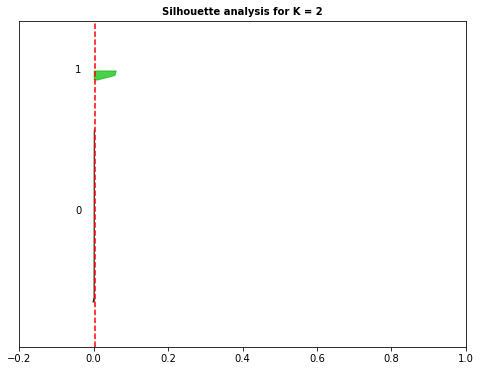

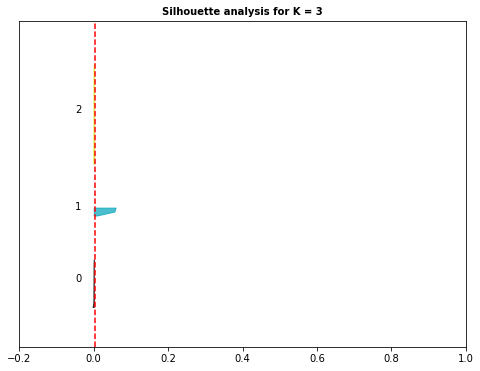

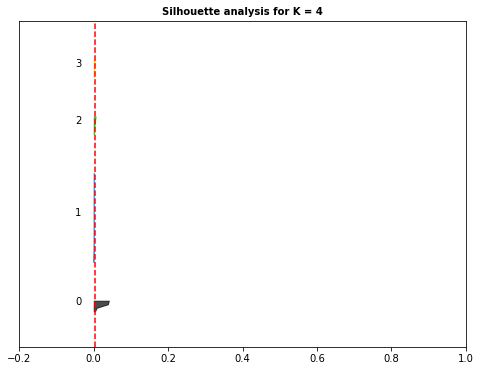

In [275]:
silhouette(kmeans_results, final_df, plot=True)

In [276]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

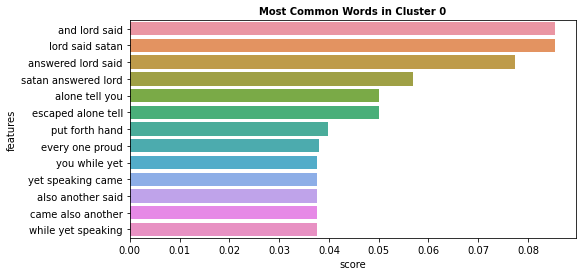

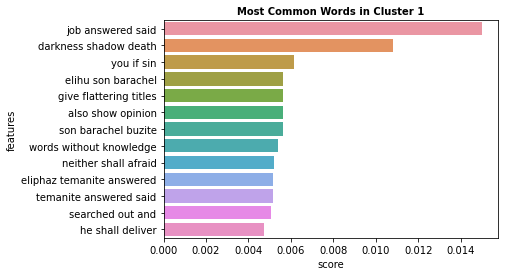

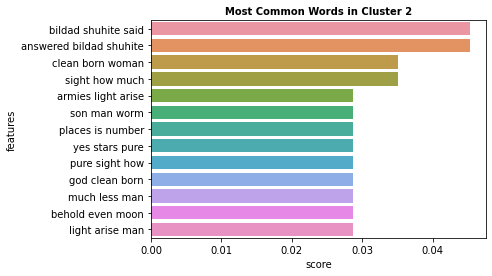

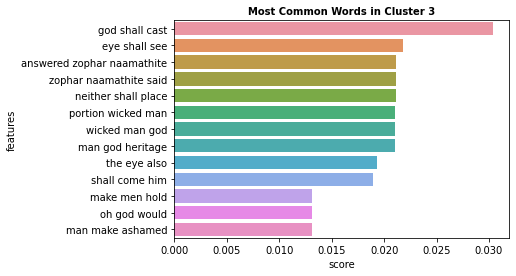

In [277]:
best_result = 4
kmeans = kmeans_results.get(best_result)

final_df_array = final_df.to_numpy()
prediction = kmeans.predict(final_df)
n_feats = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)
plotWords(dfs, 13)

In [278]:
def centroidsDict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict

def generateWordClouds(centroids):
    wordcloud = WordCloud(max_font_size=100, background_color = 'white')
    for i in range(0, len(centroids)):
        centroid_dict = centroidsDict(centroids, i)        
        wordcloud.generate_from_frequencies(centroid_dict)

        plt.figure()
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

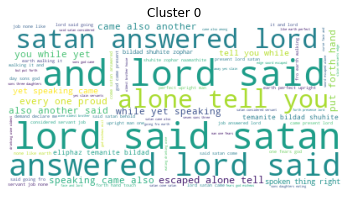

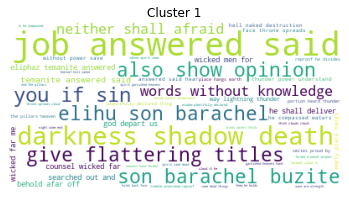

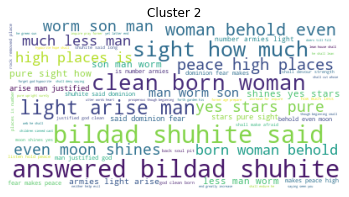

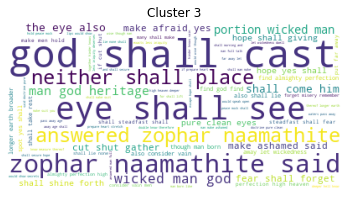

In [279]:
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = final_df.columns
generateWordClouds(centroids)

In [280]:
labels = kmeans.labels_ 
df['label'] = labels
df.head()

,Autor,Livro,label
100,Jó_1,"'man', 'land', 'uz', ',', 'whose', 'name', 'jo...",0
101,Jó_2,"'day', 'sons', 'god', 'came', 'present', 'lord...",0
102,Jó_3,"'opened', 'job', 'mouth', ',', 'cursed', 'day....",1
103,Jó_4,"'eliphaz', 'temanite', 'answered', 'said', ','...",1
104,Jó_5,"'call', ',', 'answer', ';', 'saints', 'turn', ...",1


In [281]:
print(df)

     Autor                                              Livro  label
100   Jó_1  'man', 'land', 'uz', ',', 'whose', 'name', 'jo...      0
101   Jó_2  'day', 'sons', 'god', 'came', 'present', 'lord...      0
102   Jó_3  'opened', 'job', 'mouth', ',', 'cursed', 'day....      1
103   Jó_4  'eliphaz', 'temanite', 'answered', 'said', ','...      1
104   Jó_5  'call', ',', 'answer', ';', 'saints', 'turn', ...      1
105   Jó_6  'job', 'answered', 'said', ',', 'oh', 'grief',...      1
106   Jó_7  'appointed', 'time', 'man', 'earth', '?', 'day...      3
107   Jó_8  'answered', 'bildad', 'shuhite', ',', 'said', ...      2
108   Jó_9  'job', 'answered', 'said', ',', 'know', 'truth...      1
109  Jó_10  'soul', 'weary', 'life', ';', 'leave', 'compla...      1
110  Jó_11  'answered', 'zophar', 'naamathite', ',', 'said...      3
111  Jó_12  'job', 'answered', 'said', ',', 'doubt', 'peop...      1
112  Jó_13  'see', ',', 'eye', 'seen', ',', 'ear', 'heard'...      3
113  Jó_14  'man', 'born', 'woman'